 # Demographic Analysis of NYC Public Schools

### Problem Statement
-----------
An NGO in New York City wants to create a project related to the student's participation in NY Schools according to gender. So they have decided Analyse records of  Students' Enrollment according to gender from the year 2005 to 2012 using the School Demographics and Accountability Snapshot 2006-2012 dataset, which includes the NYC public school student population by grade, special programs, ethnicity, gender, and Title I funded programs by the school and school year.
The organization wants to know the pattern in the total student enrollment between the specified years and whether it affects gender. 

### Goal
-----------
To find any specific pattern, we need to analyze students' admission to the given schools between the specified years according to gender.


## Loading and Parsing

Importing necessary packages and traversing through the JSON schema.

In [1]:
# Import Libraries
# to manage json data
import json
# for pandas dataframes
import pandas as pd

import numpy as np


import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

#send HTTP requests 
import requests

In [2]:
#Get Data from Web API
data=requests.get('https://data.cityofnewyork.us/api/views/ihfw-zy9j/rows.json').json()
data

{'meta': {'view': {'id': 'ihfw-zy9j',
   'name': '2006 - 2012 School Demographics and Accountability Snapshot',
   'assetType': 'dataset',
   'attribution': 'Department of Education (DOE)',
   'attributionLink': 'http://schools.nyc.gov/NR/rdonlyres/F318E6F9-5787-403E-8ABD-139656D7A06E/0/DemographicSnapshot2012Public.xlsx',
   'averageRating': 0,
   'category': 'Education',
   'createdAt': 1361423719,
   'description': 'Annual school accounts of NYC public school student populations served by grade, special programs, ethnicity, gender and Title I funded programs.\xa0',
   'displayType': 'table',
   'downloadCount': 5727,
   'hideFromCatalog': False,
   'hideFromDataJson': False,
   'indexUpdatedAt': 1536596810,
   'newBackend': True,
   'numberOfComments': 1,
   'oid': 2581590,
   'provenance': 'official',
   'publicationAppendEnabled': False,
   'publicationDate': 1361423794,
   'publicationGroup': 690411,
   'publicationStage': 'published',
   'rowClass': '',
   'rowsUpdatedAt': 13614

In [3]:
type(data)

dict

In [4]:
#To find keys in the json data
data.keys()

dict_keys(['meta', 'data'])

We can see meta and data are the top level keys in the given json data. A list of lists appears to be associated with data, and this likely contains each record in our dataset.

### Meta

In [5]:
data['meta'].keys()

dict_keys(['view'])

In [6]:
data['meta']['view'].keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'clientContext', 'columns', 'grants', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [7]:
len(data['meta']['view']['columns'])

46

In [8]:
data['meta']['view']['columns'][0:5]

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']}]

In [9]:
#Extracting Column Name
column_json = []
for i in data['meta']['view']['columns']:
    column_json.append(i['name'])
column_json

['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'DBN',
 'Name',
 'schoolyear',
 'fl_percent',
 'frl_percent',
 'total_enrollment',
 'prek',
 'k',
 'grade1',
 'grade2',
 'grade3',
 'grade4',
 'grade5',
 'grade6',
 'grade7',
 'grade8',
 'grade9',
 'grade10',
 'grade11',
 'grade12',
 'ell_num',
 'ell_percent',
 'sped_num',
 'sped_percent',
 'ctt_num',
 'selfcontained_num',
 'asian_num',
 'asian_per',
 'black_num',
 'black_per',
 'hispanic_num',
 'hispanic_per',
 'white_num',
 'white_per',
 'male_num',
 'male_per',
 'female_num',
 'female_per']

### Data

In [10]:
len(data['data'])

10075

In [11]:
print(data['data'][0])

['row-h6zp~rx75.iwiv', '00000000-0000-0000-C205-81EF0C7F0969', 0, 1425758466, None, 1425758466, None, '{ }', '01M015', 'P.S. 015 ROBERTO CLEMENTE', '20052006', '89.4', None, '281', '15', '36', '40', '33', '38', '52', '29', '38', None, None, None, None, None, None, '36', '12.8', '57', '20.3', '25', '9', '10', '3.6', '74', '26.3', '189', '67.3', '5', '1.8', '158', '56.2', '123', '43.8']


In [12]:
data_df = pd.DataFrame(data['data'])

In [13]:
data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,row-h6zp~rx75.iwiv,00000000-0000-0000-C205-81EF0C7F0969,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,row-bgbf_ntuw.ckdq,00000000-0000-0000-9AF5-4D58BAF51C20,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,68,28,153,63,4,1.6,140,57.6,103,42.4
2,row-mspc-8wz5_uxb8,00000000-0000-0000-9E11-73B99A1B02D9,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,row-p6za~9ikt~ums7,00000000-0000-0000-D2CD-5904BA5DC16E,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,row-55ss_ktcg~w7ru,00000000-0000-0000-9425-35118FA9200F,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4
5,row-ugmn-sxmy_fyiu,00000000-0000-0000-2070-ABC0343F1148,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,75,36.9,110,54.2,4,2,113,55.7,90,44.3
6,row-a4rf-xqy7~fvkh,00000000-0000-0000-AF7F-41FA5EB8E91E,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,63,33.3,109,57.7,4,2.1,97,51.3,92,48.7
7,row-jrvt-npgs_rssx,00000000-0000-0000-0F10-B1944AFD325B,0,1425758466,None,1425758466,None,{ },01M019,P.S. 019 ASHER LEVY,...,103,25.6,207,51.5,39,9.7,214,53.2,188,46.8
8,row-5af7.2tqr.gq8b,00000000-0000-0000-24CB-9FE42ACFC528,0,1425758466,None,1425758466,None,{ },01M019,P.S. 019 ASHER LEVY,...,70,22.4,172,55.1,19,6.1,157,50.3,155,49.7
9,row-gekz_z4n6.xmk7,00000000-0000-0000-2163-7B57947E084C,0,1425758466,None,1425758466,None,{ },01M019,P.S. 019 ASHER LEVY,...,72,21.3,186,55,22,6.5,162,47.9,176,52.1


As we can see there is no column name in this dataframe

In [14]:
#adding column headers as those details are stored in meta part of JSON.
school_df= pd.DataFrame(data['data'],columns=column_json)

In [15]:
school_df = school_df.iloc[: , 8:] #Dropping Unnecessary columns

In [16]:
school_df.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,None,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,None,243,15,29,39,38,...,68,28,153,63,4,1.6,140,57.6,103,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,None,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,None,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4


In [17]:
#Understanding Column Name
update_column_name = {
'DBN' : 'DBN', #District Borough Number
'Name' : 'School Name',
'schoolyear' : 'School Year',
'fl_percent' : 'FL Percent', #Free Lunch
'frl_percent' : 'FRL Percent', #Free and Reduced-price Lunch
'total_enrollment' : 'Total Enrollment',
'prek' : 'Pre-K',
'k' : 'Grade K',
'grade1' : 'Grade 1',
'grade2' : 'Grade 2',
'grade3' : 'Grade 3',
'grade4' : 'Grade 4',
'grade5' : 'Grade 5',
'grade6' : 'Grade 6',
'grade7' : 'Grade 7',
'grade8' : 'Grade 8',
'grade9' : 'Grade 9',
'grade10' : 'Grade 10',
'grade11' : 'Grade 11',
'grade12' : 'Grade 12',
'ell_num' : 'ELL Num', #English Language Learning
'ell_percent' : 'ELL Percent',
'sped_num' : 'SPED Num', #Special Education
'sped_percent' : 'SPED Percent',
'ctt_num' : 'CTT Num', #Collaborative Team Teaching (members of the learning community work together to increase student learning.)
'selfcontained_num' : 'Self-Contained Num', #Self-Contained Classrooms (students are taught multiple subjects by one educator)
'asian_num' : 'Asian Num',
'asian_per' : 'Asian Percent',
'black_num' : 'Black Num',
'black_per' : 'Black Percent',
'hispanic_num' : 'Hispanic Num',
'hispanic_per' : 'Hispanic Percent',
'white_num' : 'White Num',
'white_per' : 'White Percent',
'male_num' : 'Male Num',
'male_per' : 'Male Percent',
'female_num' : 'Female Num',
'female_per' : 'Female Percent'}

In [18]:
school_df.rename(columns = update_column_name, inplace = True) #updating column name

In [19]:
school_df.head()

,DBN,School Name,School Year,FL Percent,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,...,Black Num,Black Percent,Hispanic Num,Hispanic Percent,White Num,White Percent,Male Num,Male Percent,Female Num,Female Percent
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,None,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,None,243,15,29,39,38,...,68,28,153,63,4,1.6,140,57.6,103,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,None,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,None,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4


## Data Cleaning

In [20]:
#save the cleaning process in a temporary dataframe
temp_df = school_df.copy()

In [21]:
print(temp_df.columns)

Index(['DBN', 'School Name', 'School Year', 'FL Percent', 'FRL Percent',
       'Total Enrollment', 'Pre-K', 'Grade K', 'Grade 1', 'Grade 2', 'Grade 3',
       'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9',
       'Grade 10', 'Grade 11', 'Grade 12', 'ELL Num', 'ELL Percent',
       'SPED Num', 'SPED Percent', 'CTT Num', 'Self-Contained Num',
       'Asian Num', 'Asian Percent', 'Black Num', 'Black Percent',
       'Hispanic Num', 'Hispanic Percent', 'White Num', 'White Percent',
       'Male Num', 'Male Percent', 'Female Num', 'Female Percent'],
      dtype='object')


In [22]:
#Check for non digit values and its count 
temp_df.dtypes

DBN                   object
School Name           object
School Year           object
FL Percent            object
FRL Percent           object
Total Enrollment      object
Pre-K                 object
Grade K               object
Grade 1               object
Grade 2               object
Grade 3               object
Grade 4               object
Grade 5               object
Grade 6               object
Grade 7               object
Grade 8               object
Grade 9               object
Grade 10              object
Grade 11              object
Grade 12              object
ELL Num               object
ELL Percent           object
SPED Num              object
SPED Percent          object
CTT Num               object
Self-Contained Num    object
Asian Num             object
Asian Percent         object
Black Num             object
Black Percent         object
Hispanic Num          object
Hispanic Percent      object
White Num             object
White Percent         object
Male Num      

In [23]:
#many columns have none values, space are present,i.e,they have non digit values 
#we check in each column's each row  ,we list the non digit values and store it in the list.
#.replace is for float number ,,,is sdiigit iwll not give,,so dot maria integer avm,so it wil bethen true
#Check for non digit values and its count
for column in temp_df.drop(['DBN', 'School Name', 'School Year'],axis='columns'):
    non_digivalue = []
    count = 0
    for row in range(10075):
        if not str(temp_df[column].iloc[row]).replace('.', '', 1).isdigit():
            count += 1
            if temp_df[column].iloc[row] not in non_digivalue:
                non_digivalue.append(temp_df[column].iloc[row])
    print("column:",column ,", non-digit values:",non_digivalue ,", count:",count)

column: FL Percent , non-digit values: ['   ', None, 'n/a'] , count: 4488
column: FRL Percent , non-digit values: [None] , count: 5593
column: Total Enrollment , non-digit values: [] , count: 0
column: Pre-K , non-digit values: [None, '    '] , count: 6313
column: Grade K , non-digit values: [None, '    '] , count: 4941
column: Grade 1 , non-digit values: [None, '    '] , count: 4946
column: Grade 2 , non-digit values: [None, '    '] , count: 4988
column: Grade 3 , non-digit values: [None, '    '] , count: 5074
column: Grade 4 , non-digit values: [None, '    '] , count: 5127
column: Grade 5 , non-digit values: [None, '    '] , count: 5089
column: Grade 6 , non-digit values: [None, '    '] , count: 6563
column: Grade 7 , non-digit values: [None, '    '] , count: 6895
column: Grade 8 , non-digit values: [None, '    '] , count: 7021
column: Grade 9 , non-digit values: [None, '    '] , count: 7152
column: Grade 10 , non-digit values: [None, '    '] , count: 7284
column: Grade 11 , non-digi

In [24]:
temp_df.head(15)

,DBN,School Name,School Year,FL Percent,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,...,Black Num,Black Percent,Hispanic Num,Hispanic Percent,White Num,White Percent,Male Num,Male Percent,Female Num,Female Percent
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,None,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,None,243,15,29,39,38,...,68,28,153,63,4,1.6,140,57.6,103,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,None,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,None,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2,113,55.7,90,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,None,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97,51.3,92,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,None,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214,53.2,188,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,None,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157,50.3,155,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,None,338,28,48,46,47,...,72,21.3,186,55,22,6.5,162,47.9,176,52.1


In [25]:
#checking for empty values
for i in temp_df[['DBN', 'School Name', 'School Year']]:
    empty_val = []
    count = 0
    for j in range(10075):
        if temp_df[i].iloc[j] in [None," "]:
            count += 1
            if temp_df[i].iloc[j] not in empty_val:
                empty_val.append(temp_df[i].iloc[j])
    print("column:",i,empty_val,", count",count)

column: DBN [] , count 0
column: School Name [] , count 0
column: School Year [] , count 0


In [26]:
#Selecting the non digit values
#create a dataframe with boolean values which has False for all digit value positions
data_null = temp_df.isnull().ne(temp_df.eq('   ').ne(temp_df.eq('n/a').ne(temp_df.eq('    ').ne(temp_df.eq('NA')))))

In [27]:
data_null.head(10)

,DBN,School Name,School Year,FL Percent,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,...,Black Num,Black Percent,Hispanic Num,Hispanic Percent,White Num,White Percent,Male Num,Male Percent,Female Num,Female Percent
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
#Reset the number null values to 0 and changing the datatype of columns to its respective ones.
for i in data_null:
    for j in range(10075):
        if data_null[i].iloc[j] == True:
            if i not in ['DBN', 'School Name', 'School Year']:
                temp_df.iat[j, temp_df.columns.get_loc(i)] = 0
            else:
                temp_df.iat[j, temp_df.columns.get_loc(i)] = None
    if i in ['FL Percent', 'FRL Percent', 'ELL Percent', 'SPED Percent', 'Asian Percent', 'Black Percent', 'Hispanic Percent',  'White Percent', 'Male Percent', 'Female Percent']:
        temp_df[i] = temp_df[i].astype(float)
    elif i not in ['DBN', 'School Name', 'School Year']:
        temp_df[i] = temp_df[i].astype(int)

In [29]:
temp_df.head(15)

,DBN,School Name,School Year,FL Percent,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,...,Black Num,Black Percent,Hispanic Num,Hispanic Percent,White Num,White Percent,Male Num,Male Percent,Female Num,Female Percent
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,0.0,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,0.0,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140,57.6,103,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,0.0,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,0.0,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,0.0,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,0.0,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113,55.7,90,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,0.0,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97,51.3,92,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,0.0,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214,53.2,188,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,0.0,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157,50.3,155,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,0.0,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162,47.9,176,52.1


In [30]:
#Strip Leading and Trailing Space
#Appending DBN and School Name to make School Name Unique
temp_df['School Name'] = temp_df['DBN'].str.strip() + "-" + temp_df['School Name'].str.strip()
del temp_df['DBN']
temp_df['School Year'] = temp_df['School Year'].str.strip()

In [31]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   School Name         10075 non-null  object 
 1   School Year         10075 non-null  object 
 2   FL Percent          10075 non-null  float64
 3   FRL Percent         10075 non-null  float64
 4   Total Enrollment    10075 non-null  int32  
 5   Pre-K               10075 non-null  int32  
 6   Grade K             10075 non-null  int32  
 7   Grade 1             10075 non-null  int32  
 8   Grade 2             10075 non-null  int32  
 9   Grade 3             10075 non-null  int32  
 10  Grade 4             10075 non-null  int32  
 11  Grade 5             10075 non-null  int32  
 12  Grade 6             10075 non-null  int32  
 13  Grade 7             10075 non-null  int32  
 14  Grade 8             10075 non-null  int32  
 15  Grade 9             10075 non-null  int32  
 16  Grad

In [32]:
temp_df.dtypes

School Name            object
School Year            object
FL Percent            float64
FRL Percent           float64
Total Enrollment        int32
Pre-K                   int32
Grade K                 int32
Grade 1                 int32
Grade 2                 int32
Grade 3                 int32
Grade 4                 int32
Grade 5                 int32
Grade 6                 int32
Grade 7                 int32
Grade 8                 int32
Grade 9                 int32
Grade 10                int32
Grade 11                int32
Grade 12                int32
ELL Num                 int32
ELL Percent           float64
SPED Num                int32
SPED Percent          float64
CTT Num                 int32
Self-Contained Num      int32
Asian Num               int32
Asian Percent         float64
Black Num               int32
Black Percent         float64
Hispanic Num            int32
Hispanic Percent      float64
White Num               int32
White Percent         float64
Male Num  

In [33]:
#To check FL Percent and FRL Percent are almost meant for the same purpose
#FL =Free Lunch 
#FLR = Free or Reduced-price Lunch
temp_df[['FL Percent','FRL Percent']].head(10)

,FL Percent,FRL Percent
0,89.4,0.0
1,89.4,0.0
2,89.4,0.0
3,89.4,0.0
4,0.0,96.5
5,0.0,96.5
6,0.0,89.4
7,61.5,0.0
8,61.5,0.0
9,61.5,0.0


In [34]:
for i in range(10075):
    if temp_df['FL Percent'].iloc[i] > 0:
        if temp_df['FRL Percent'].iloc[i] > 0:
            print(i,temp_df['FL Percent'].iloc[i],temp_df['FRL Percent'].iloc[i])
    else:
        if temp_df['FRL Percent'].iloc[i] <= 0:
             print("Row:",i,temp_df['FL Percent'].iloc[i],temp_df['FRL Percent'].iloc[i])

Row: 1123 0.0 0.0
Row: 2153 0.0 0.0
Row: 2160 0.0 0.0
Row: 4298 0.0 0.0
Row: 8522 0.0 0.0
Row: 8856 0.0 0.0


It is observed that schools having FL Percent have 0 as FRL Percent and vice versa.Thus it is safe to assume FL is almost equal to FLR

In [35]:
# Thus Merging FL Percent and FRL Percent (Free Lunch ~ Free or Reduced-price Lunch)
temp_df['FRL Percent'] = temp_df['FL Percent'] + temp_df['FRL Percent']
del temp_df['FL Percent']

In [36]:
temp_df.head(15)

,School Name,School Year,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,Black Num,Black Percent,Hispanic Num,Hispanic Percent,White Num,White Percent,Male Num,Male Percent,Female Num,Female Percent
0,01M015-P.S. 015 ROBERTO CLEMENTE,20052006,89.4,281,15,36,40,33,38,52,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015-P.S. 015 ROBERTO CLEMENTE,20062007,89.4,243,15,29,39,38,34,42,...,68,28.0,153,63.0,4,1.6,140,57.6,103,42.4
2,01M015-P.S. 015 ROBERTO CLEMENTE,20072008,89.4,261,18,43,39,36,38,47,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015-P.S. 015 ROBERTO CLEMENTE,20082009,89.4,252,17,37,44,32,34,39,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015-P.S. 015 ROBERTO CLEMENTE,20092010,96.5,208,16,40,28,32,30,24,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4
5,01M015-P.S. 015 ROBERTO CLEMENTE,20102011,96.5,203,13,37,35,33,30,30,...,75,36.9,110,54.2,4,2.0,113,55.7,90,44.3
6,01M015-P.S. 015 ROBERTO CLEMENTE,20112012,89.4,189,13,31,35,28,25,28,...,63,33.3,109,57.7,4,2.1,97,51.3,92,48.7
7,01M019-P.S. 019 ASHER LEVY,20052006,61.5,402,15,43,55,53,68,59,...,103,25.6,207,51.5,39,9.7,214,53.2,188,46.8
8,01M019-P.S. 019 ASHER LEVY,20062007,61.5,312,13,37,45,52,47,61,...,70,22.4,172,55.1,19,6.1,157,50.3,155,49.7
9,01M019-P.S. 019 ASHER LEVY,20072008,61.5,338,28,48,46,47,53,48,...,72,21.3,186,55.0,22,6.5,162,47.9,176,52.1


In [37]:
#Deleting Percentages because it can be easily calculaed with Num and total count
temp_df.drop(['ELL Percent', 'SPED Percent', 'Asian Percent', 'Black Percent', 'Hispanic Percent',  'White Percent', 'Male Percent', 'Female Percent'],axis=1, inplace=True)

In [38]:
temp_df.describe()

,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,ELL Num,SPED Num,CTT Num,Self-Contained Num,Asian Num,Black Num,Hispanic Num,White Num,Male Num,Female Num
count,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,...,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000
mean,70.512953,676.251712,14.668486,47.961787,51.783226,50.720298,49.795236,49.247146,48.916129,48.729529,...,92.335087,92.224417,22.730620,33.580050,99.564864,204.336576,267.675335,97.051613,343.927543,332.324069
std,21.411832,571.479380,22.114172,57.969776,62.093064,61.038560,60.755170,60.507189,60.017068,96.447340,...,127.967860,71.768849,23.947238,37.397693,216.198496,242.231283,282.473135,206.012658,302.091615,282.490917
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.400000,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,48.000000,3.000000,7.000000,4.000000,50.000000,81.000000,4.000000,176.000000,176.000000
50%,76.100000,534.000000,0.000000,26.000000,27.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,45.000000,79.000000,16.000000,25.000000,16.000000,127.000000,186.000000,13.000000,273.000000,266.000000
75%,86.500000,804.500000,33.000000,87.000000,95.000000,92.000000,91.000000,91.000000,90.000000,70.000000,...,117.000000,118.000000,35.000000,47.000000,89.000000,267.000000,348.000000,88.000000,412.000000,394.000000
max,100.000000,5332.000000,143.000000,361.000000,368.000000,369.000000,377.000000,390.000000,398.000000,812.000000,...,1418.000000,751.000000,258.000000,440.000000,3214.000000,3852.000000,2903.000000,3181.000000,3106.000000,2497.000000


In [39]:
temp_df.head()

,School Name,School Year,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,ELL Num,SPED Num,CTT Num,Self-Contained Num,Asian Num,Black Num,Hispanic Num,White Num,Male Num,Female Num
0,01M015-P.S. 015 ROBERTO CLEMENTE,20052006,89.4,281,15,36,40,33,38,52,...,36,57,25,9,10,74,189,5,158,123
1,01M015-P.S. 015 ROBERTO CLEMENTE,20062007,89.4,243,15,29,39,38,34,42,...,38,55,19,15,18,68,153,4,140,103
2,01M015-P.S. 015 ROBERTO CLEMENTE,20072008,89.4,261,18,43,39,36,38,47,...,52,60,20,14,16,77,157,7,143,118
3,01M015-P.S. 015 ROBERTO CLEMENTE,20082009,89.4,252,17,37,44,32,34,39,...,48,62,21,17,16,75,149,7,149,103
4,01M015-P.S. 015 ROBERTO CLEMENTE,20092010,96.5,208,16,40,28,32,30,24,...,40,46,14,14,16,67,118,6,124,84


### Data Testing 

In [40]:
#To check Sum of all grades gives total enrollment
temp_df.iloc[ :,4:19].head()

,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,ELL Num
0,15,36,40,33,38,52,29,38,0,0,0,0,0,0,36
1,15,29,39,38,34,42,46,0,0,0,0,0,0,0,38
2,18,43,39,36,38,47,40,0,0,0,0,0,0,0,52
3,17,37,44,32,34,39,49,0,0,0,0,0,0,0,48
4,16,40,28,32,30,24,38,0,0,0,0,0,0,0,40


In [41]:
sumCheck = temp_df['Pre-K'].copy()
for i in temp_df.iloc[ : ,6:19]:
    sumCheck += temp_df[i]
sumCheck = sumCheck.to_frame()
sumCheck.columns = ["Sum"]
sumCheck['Total Enrollment'] = temp_df['Total Enrollment'].copy()
sumCheck

,Sum,Total Enrollment
0,281,281
1,252,243
2,270,261
3,263,252
4,208,208
...,...,...
10070,376,355
10071,393,383
10072,412,395
10073,440,420


In [42]:
count=0
for i in range(10075):
    
    if sumCheck['Sum'].iloc[i] != sumCheck['Total Enrollment'].iloc[i]:
        count =count+ 1
        print(sumCheck.iloc[i])
print("total count when Sum of all grades is not equal to  total enrollment :",count)

Sum                 252
Total Enrollment    243
Name: 1, dtype: int32
Sum                 270
Total Enrollment    261
Name: 2, dtype: int32
Sum                 263
Total Enrollment    252
Name: 3, dtype: int32
Sum                 196
Total Enrollment    203
Name: 5, dtype: int32
Sum                 178
Total Enrollment    189
Name: 6, dtype: int32
Sum                 396
Total Enrollment    402
Name: 7, dtype: int32
Sum                 305
Total Enrollment    312
Name: 8, dtype: int32
Sum                 330
Total Enrollment    338
Name: 9, dtype: int32
Sum                 308
Total Enrollment    325
Name: 10, dtype: int32
Sum                 308
Total Enrollment    321
Name: 11, dtype: int32
Sum                 306
Total Enrollment    328
Name: 12, dtype: int32
Sum                 315
Total Enrollment    328
Name: 13, dtype: int32
Sum                 1221
Total Enrollment     835
Name: 14, dtype: int32
Sum                 799
Total Enrollment    655
Name: 15, dtype: int32
Sum         

Name: 220, dtype: int32
Sum                 1049
Total Enrollment     799
Name: 221, dtype: int32
Sum                 1101
Total Enrollment     832
Name: 222, dtype: int32
Sum                 1065
Total Enrollment     816
Name: 223, dtype: int32
Sum                 491
Total Enrollment    563
Name: 224, dtype: int32
Sum                 492
Total Enrollment    551
Name: 225, dtype: int32
Sum                 516
Total Enrollment    585
Name: 226, dtype: int32
Sum                 563
Total Enrollment    640
Name: 227, dtype: int32
Sum                 528
Total Enrollment    625
Name: 228, dtype: int32
Sum                 646
Total Enrollment    720
Name: 229, dtype: int32
Sum                 666
Total Enrollment    813
Name: 230, dtype: int32
Sum                 721
Total Enrollment    842
Name: 231, dtype: int32
Sum                 688
Total Enrollment    794
Name: 232, dtype: int32
Sum                 682
Total Enrollment    798
Name: 233, dtype: int32
Sum                 676
Total Enro

Name: 431, dtype: int32
Sum                 388
Total Enrollment    385
Name: 432, dtype: int32
Sum                 412
Total Enrollment    408
Name: 433, dtype: int32
Sum                 411
Total Enrollment    406
Name: 434, dtype: int32
Sum                 391
Total Enrollment    388
Name: 435, dtype: int32
Sum                 387
Total Enrollment    386
Name: 436, dtype: int32
Sum                 238
Total Enrollment    236
Name: 437, dtype: int32
Sum                 250
Total Enrollment    246
Name: 438, dtype: int32
Sum                 246
Total Enrollment    244
Name: 439, dtype: int32
Sum                 272
Total Enrollment    270
Name: 440, dtype: int32
Sum                 277
Total Enrollment    269
Name: 441, dtype: int32
Sum                 283
Total Enrollment    273
Name: 442, dtype: int32
Sum                 266
Total Enrollment    256
Name: 443, dtype: int32
Sum                  7
Total Enrollment    46
Name: 444, dtype: int32
Sum                 44
Total Enrollment   

Name: 655, dtype: int32
Sum                 146
Total Enrollment     79
Name: 656, dtype: int32
Sum                 327
Total Enrollment    175
Name: 657, dtype: int32
Sum                 531
Total Enrollment    497
Name: 658, dtype: int32
Sum                 378
Total Enrollment    360
Name: 659, dtype: int32
Sum                 406
Total Enrollment    378
Name: 660, dtype: int32
Sum                 393
Total Enrollment    380
Name: 661, dtype: int32
Sum                 421
Total Enrollment    394
Name: 662, dtype: int32
Sum                 381
Total Enrollment    354
Name: 663, dtype: int32
Sum                 318
Total Enrollment    294
Name: 664, dtype: int32
Sum                 154
Total Enrollment    141
Name: 665, dtype: int32
Sum                 230
Total Enrollment    214
Name: 666, dtype: int32
Sum                 119
Total Enrollment    110
Name: 667, dtype: int32
Sum                 246
Total Enrollment    226
Name: 668, dtype: int32
Sum                 169
Total Enrollment

Name: 904, dtype: int32
Sum                 198
Total Enrollment    193
Name: 905, dtype: int32
Sum                 218
Total Enrollment    215
Name: 906, dtype: int32
Sum                 223
Total Enrollment    213
Name: 907, dtype: int32
Sum                 235
Total Enrollment    224
Name: 908, dtype: int32
Sum                 222
Total Enrollment    211
Name: 909, dtype: int32
Sum                 263
Total Enrollment    243
Name: 910, dtype: int32
Sum                 318
Total Enrollment    289
Name: 911, dtype: int32
Sum                 402
Total Enrollment    433
Name: 912, dtype: int32
Sum                 427
Total Enrollment    494
Name: 913, dtype: int32
Sum                 455
Total Enrollment    510
Name: 914, dtype: int32
Sum                 465
Total Enrollment    523
Name: 915, dtype: int32
Sum                 480
Total Enrollment    566
Name: 916, dtype: int32
Sum                 520
Total Enrollment    597
Name: 917, dtype: int32
Sum                 543
Total Enrollment

Name: 1052, dtype: int32
Sum                 175
Total Enrollment    165
Name: 1053, dtype: int32
Sum                 299
Total Enrollment    293
Name: 1054, dtype: int32
Sum                 326
Total Enrollment    322
Name: 1055, dtype: int32
Sum                 339
Total Enrollment    332
Name: 1056, dtype: int32
Sum                 375
Total Enrollment    362
Name: 1057, dtype: int32
Sum                 411
Total Enrollment    395
Name: 1058, dtype: int32
Sum                 415
Total Enrollment    403
Name: 1059, dtype: int32
Sum                 410
Total Enrollment    402
Name: 1060, dtype: int32
Sum                 216
Total Enrollment    206
Name: 1061, dtype: int32
Sum                 229
Total Enrollment    211
Name: 1062, dtype: int32
Sum                 251
Total Enrollment    220
Name: 1063, dtype: int32
Sum                 138
Total Enrollment    125
Name: 1064, dtype: int32
Sum                 59
Total Enrollment    53
Name: 1065, dtype: int32
Sum                 235
Tota

Name: 1208, dtype: int32
Sum                 475
Total Enrollment    462
Name: 1209, dtype: int32
Sum                 460
Total Enrollment    441
Name: 1210, dtype: int32
Sum                 433
Total Enrollment    412
Name: 1211, dtype: int32
Sum                 437
Total Enrollment    413
Name: 1212, dtype: int32
Sum                 329
Total Enrollment    328
Name: 1213, dtype: int32
Sum                 320
Total Enrollment    318
Name: 1214, dtype: int32
Sum                 306
Total Enrollment    295
Name: 1215, dtype: int32
Sum                 300
Total Enrollment    291
Name: 1216, dtype: int32
Sum                 303
Total Enrollment    290
Name: 1217, dtype: int32
Sum                 304
Total Enrollment    295
Name: 1218, dtype: int32
Sum                 324
Total Enrollment    317
Name: 1219, dtype: int32
Sum                 506
Total Enrollment    464
Name: 1220, dtype: int32
Sum                 481
Total Enrollment    455
Name: 1221, dtype: int32
Sum                 501
To

Name: 1414, dtype: int32
Sum                 158
Total Enrollment    188
Name: 1415, dtype: int32
Sum                 165
Total Enrollment    189
Name: 1416, dtype: int32
Sum                 165
Total Enrollment    201
Name: 1417, dtype: int32
Sum                 174
Total Enrollment    204
Name: 1418, dtype: int32
Sum                 179
Total Enrollment    207
Name: 1419, dtype: int32
Sum                 179
Total Enrollment    208
Name: 1420, dtype: int32
Sum                 344
Total Enrollment    328
Name: 1421, dtype: int32
Sum                 323
Total Enrollment    306
Name: 1422, dtype: int32
Sum                 341
Total Enrollment    311
Name: 1423, dtype: int32
Sum                 354
Total Enrollment    328
Name: 1424, dtype: int32
Sum                 352
Total Enrollment    332
Name: 1425, dtype: int32
Sum                 422
Total Enrollment    404
Name: 1426, dtype: int32
Sum                 463
Total Enrollment    445
Name: 1427, dtype: int32
Sum                 401
To

Name: 1602, dtype: int32
Sum                 429
Total Enrollment    405
Name: 1603, dtype: int32
Sum                 430
Total Enrollment    404
Name: 1604, dtype: int32
Sum                 424
Total Enrollment    398
Name: 1605, dtype: int32
Sum                 463
Total Enrollment    426
Name: 1606, dtype: int32
Sum                 209
Total Enrollment    207
Name: 1607, dtype: int32
Sum                 204
Total Enrollment    201
Name: 1608, dtype: int32
Sum                 201
Total Enrollment    195
Name: 1609, dtype: int32
Sum                 202
Total Enrollment    193
Name: 1610, dtype: int32
Sum                 147
Total Enrollment    139
Name: 1611, dtype: int32
Sum                 67
Total Enrollment    65
Name: 1612, dtype: int32
Sum                 35
Total Enrollment    59
Name: 1613, dtype: int32
Sum                  73
Total Enrollment    101
Name: 1614, dtype: int32
Sum                 110
Total Enrollment    139
Name: 1615, dtype: int32
Sum                 151
Total 

Name: 1724, dtype: int32
Sum                 1368
Total Enrollment    1115
Name: 1725, dtype: int32
Sum                 1190
Total Enrollment     922
Name: 1726, dtype: int32
Sum                 1190
Total Enrollment     919
Name: 1727, dtype: int32
Sum                 1109
Total Enrollment     828
Name: 1728, dtype: int32
Sum                 1002
Total Enrollment     733
Name: 1729, dtype: int32
Sum                 895
Total Enrollment    649
Name: 1730, dtype: int32
Sum                 531
Total Enrollment    423
Name: 1731, dtype: int32
Sum                 3
Total Enrollment    2
Name: 1732, dtype: int32
Sum                 880
Total Enrollment    707
Name: 1733, dtype: int32
Sum                 810
Total Enrollment    632
Name: 1734, dtype: int32
Sum                 830
Total Enrollment    618
Name: 1735, dtype: int32
Sum                 807
Total Enrollment    613
Name: 1736, dtype: int32
Sum                 952
Total Enrollment    697
Name: 1737, dtype: int32
Sum                 

Name: 1859, dtype: int32
Sum                 483
Total Enrollment    432
Name: 1860, dtype: int32
Sum                 312
Total Enrollment    309
Name: 1861, dtype: int32
Sum                 285
Total Enrollment    296
Name: 1862, dtype: int32
Sum                 285
Total Enrollment    277
Name: 1863, dtype: int32
Sum                 277
Total Enrollment    276
Name: 1864, dtype: int32
Sum                 262
Total Enrollment    263
Name: 1865, dtype: int32
Sum                 245
Total Enrollment    258
Name: 1866, dtype: int32
Sum                 225
Total Enrollment    243
Name: 1867, dtype: int32
Sum                 406
Total Enrollment    313
Name: 1868, dtype: int32
Sum                 583
Total Enrollment    462
Name: 1869, dtype: int32
Sum                 620
Total Enrollment    472
Name: 1870, dtype: int32
Sum                 628
Total Enrollment    484
Name: 1871, dtype: int32
Sum                 736
Total Enrollment    538
Name: 1872, dtype: int32
Sum                 788
To

Name: 2008, dtype: int32
Sum                 527
Total Enrollment    499
Name: 2009, dtype: int32
Sum                 547
Total Enrollment    525
Name: 2010, dtype: int32
Sum                 499
Total Enrollment    475
Name: 2011, dtype: int32
Sum                 554
Total Enrollment    521
Name: 2012, dtype: int32
Sum                 565
Total Enrollment    519
Name: 2013, dtype: int32
Sum                 611
Total Enrollment    550
Name: 2014, dtype: int32
Sum                 745
Total Enrollment    619
Name: 2015, dtype: int32
Sum                 676
Total Enrollment    579
Name: 2016, dtype: int32
Sum                 623
Total Enrollment    488
Name: 2017, dtype: int32
Sum                 434
Total Enrollment    361
Name: 2018, dtype: int32
Sum                 432
Total Enrollment    361
Name: 2019, dtype: int32
Sum                 392
Total Enrollment    350
Name: 2020, dtype: int32
Sum                 439
Total Enrollment    397
Name: 2021, dtype: int32
Sum                 705
To

Name: 2139, dtype: int32
Sum                 445
Total Enrollment    400
Name: 2140, dtype: int32
Sum                 410
Total Enrollment    342
Name: 2141, dtype: int32
Sum                 450
Total Enrollment    356
Name: 2142, dtype: int32
Sum                 449
Total Enrollment    347
Name: 2143, dtype: int32
Sum                 513
Total Enrollment    382
Name: 2144, dtype: int32
Sum                 504
Total Enrollment    373
Name: 2145, dtype: int32
Sum                 555
Total Enrollment    516
Name: 2146, dtype: int32
Sum                 539
Total Enrollment    541
Name: 2147, dtype: int32
Sum                 585
Total Enrollment    550
Name: 2148, dtype: int32
Sum                 595
Total Enrollment    544
Name: 2149, dtype: int32
Sum                 545
Total Enrollment    519
Name: 2150, dtype: int32
Sum                 568
Total Enrollment    529
Name: 2151, dtype: int32
Sum                 530
Total Enrollment    509
Name: 2152, dtype: int32
Sum                 122
To

Name: 2322, dtype: int32
Sum                 581
Total Enrollment    596
Name: 2323, dtype: int32
Sum                 594
Total Enrollment    602
Name: 2324, dtype: int32
Sum                 585
Total Enrollment    611
Name: 2325, dtype: int32
Sum                 1118
Total Enrollment    1234
Name: 2326, dtype: int32
Sum                 1305
Total Enrollment    1409
Name: 2327, dtype: int32
Sum                 1472
Total Enrollment    1567
Name: 2328, dtype: int32
Sum                 1517
Total Enrollment    1637
Name: 2329, dtype: int32
Sum                 1557
Total Enrollment    1632
Name: 2330, dtype: int32
Sum                 1596
Total Enrollment    1645
Name: 2331, dtype: int32
Sum                 1607
Total Enrollment    1634
Name: 2332, dtype: int32
Sum                 905
Total Enrollment    998
Name: 2333, dtype: int32
Sum                 861
Total Enrollment    931
Name: 2334, dtype: int32
Sum                 868
Total Enrollment    904
Name: 2335, dtype: int32
Sum         

Name: 2543, dtype: int32
Sum                 287
Total Enrollment    260
Name: 2544, dtype: int32
Sum                 315
Total Enrollment    287
Name: 2545, dtype: int32
Sum                 108
Total Enrollment    102
Name: 2546, dtype: int32
Sum                 264
Total Enrollment    248
Name: 2547, dtype: int32
Sum                 413
Total Enrollment    377
Name: 2548, dtype: int32
Sum                 398
Total Enrollment    352
Name: 2549, dtype: int32
Sum                 281
Total Enrollment    243
Name: 2550, dtype: int32
Sum                 117
Total Enrollment    107
Name: 2551, dtype: int32
Sum                 231
Total Enrollment    215
Name: 2552, dtype: int32
Sum                 331
Total Enrollment    307
Name: 2553, dtype: int32
Sum                 420
Total Enrollment    404
Name: 2554, dtype: int32
Sum                 513
Total Enrollment    500
Name: 2555, dtype: int32
Sum                 132
Total Enrollment    130
Name: 2556, dtype: int32
Sum                 305
To

Name: 2791, dtype: int32
Sum                 769
Total Enrollment    735
Name: 2792, dtype: int32
Sum                 230
Total Enrollment    227
Name: 2793, dtype: int32
Sum                 259
Total Enrollment    255
Name: 2794, dtype: int32
Sum                 291
Total Enrollment    280
Name: 2795, dtype: int32
Sum                 307
Total Enrollment    295
Name: 2796, dtype: int32
Sum                 329
Total Enrollment    311
Name: 2797, dtype: int32
Sum                 355
Total Enrollment    333
Name: 2798, dtype: int32
Sum                 394
Total Enrollment    365
Name: 2799, dtype: int32
Sum                 573
Total Enrollment    630
Name: 2800, dtype: int32
Sum                 564
Total Enrollment    598
Name: 2801, dtype: int32
Sum                 619
Total Enrollment    590
Name: 2802, dtype: int32
Sum                 618
Total Enrollment    587
Name: 2803, dtype: int32
Sum                 588
Total Enrollment    558
Name: 2804, dtype: int32
Sum                 591
To

Name: 2906, dtype: int32
Sum                 317
Total Enrollment    407
Name: 2907, dtype: int32
Sum                 173
Total Enrollment    163
Name: 2908, dtype: int32
Sum                 267
Total Enrollment    249
Name: 2909, dtype: int32
Sum                 353
Total Enrollment    323
Name: 2910, dtype: int32
Sum                 344
Total Enrollment    309
Name: 2911, dtype: int32
Sum                 291
Total Enrollment    253
Name: 2912, dtype: int32
Sum                 267
Total Enrollment    227
Name: 2913, dtype: int32
Sum                 169
Total Enrollment    141
Name: 2914, dtype: int32
Sum                 167
Total Enrollment    159
Name: 2915, dtype: int32
Sum                 256
Total Enrollment    241
Name: 2916, dtype: int32
Sum                 353
Total Enrollment    334
Name: 2917, dtype: int32
Sum                 454
Total Enrollment    420
Name: 2918, dtype: int32
Sum                 550
Total Enrollment    505
Name: 2919, dtype: int32
Sum                 641
To

Name: 3059, dtype: int32
Sum                 575
Total Enrollment    457
Name: 3060, dtype: int32
Sum                 561
Total Enrollment    445
Name: 3061, dtype: int32
Sum                 563
Total Enrollment    413
Name: 3062, dtype: int32
Sum                 529
Total Enrollment    382
Name: 3063, dtype: int32
Sum                 395
Total Enrollment    314
Name: 3064, dtype: int32
Sum                 507
Total Enrollment    391
Name: 3065, dtype: int32
Sum                 595
Total Enrollment    471
Name: 3066, dtype: int32
Sum                  87
Total Enrollment    137
Name: 3067, dtype: int32
Sum                 194
Total Enrollment    227
Name: 3068, dtype: int32
Sum                 293
Total Enrollment    298
Name: 3069, dtype: int32
Sum                 170
Total Enrollment    134
Name: 3070, dtype: int32
Sum                 317
Total Enrollment    248
Name: 3071, dtype: int32
Sum                 471
Total Enrollment    382
Name: 3072, dtype: int32
Sum                 355
To

Name: 3207, dtype: int32
Sum                 553
Total Enrollment    504
Name: 3208, dtype: int32
Sum                 555
Total Enrollment    535
Name: 3209, dtype: int32
Sum                 547
Total Enrollment    521
Name: 3210, dtype: int32
Sum                 604
Total Enrollment    561
Name: 3211, dtype: int32
Sum                 614
Total Enrollment    590
Name: 3212, dtype: int32
Sum                 613
Total Enrollment    575
Name: 3213, dtype: int32
Sum                 683
Total Enrollment    661
Name: 3214, dtype: int32
Sum                 670
Total Enrollment    677
Name: 3215, dtype: int32
Sum                 594
Total Enrollment    558
Name: 3216, dtype: int32
Sum                 591
Total Enrollment    561
Name: 3217, dtype: int32
Sum                 590
Total Enrollment    532
Name: 3218, dtype: int32
Sum                 580
Total Enrollment    551
Name: 3219, dtype: int32
Sum                 590
Total Enrollment    558
Name: 3220, dtype: int32
Sum                 618
To

Name: 3329, dtype: int32
Sum                 411
Total Enrollment    372
Name: 3330, dtype: int32
Sum                 472
Total Enrollment    404
Name: 3331, dtype: int32
Sum                 513
Total Enrollment    429
Name: 3332, dtype: int32
Sum                 513
Total Enrollment    444
Name: 3333, dtype: int32
Sum                 404
Total Enrollment    386
Name: 3334, dtype: int32
Sum                 459
Total Enrollment    442
Name: 3335, dtype: int32
Sum                 480
Total Enrollment    459
Name: 3336, dtype: int32
Sum                 526
Total Enrollment    510
Name: 3337, dtype: int32
Sum                 554
Total Enrollment    528
Name: 3338, dtype: int32
Sum                 555
Total Enrollment    528
Name: 3339, dtype: int32
Sum                 547
Total Enrollment    524
Name: 3340, dtype: int32
Sum                 517
Total Enrollment    444
Name: 3341, dtype: int32
Sum                 476
Total Enrollment    441
Name: 3342, dtype: int32
Sum                 482
To

Name: 3471, dtype: int32
Sum                 459
Total Enrollment    372
Name: 3472, dtype: int32
Sum                 450
Total Enrollment    368
Name: 3473, dtype: int32
Sum                 555
Total Enrollment    527
Name: 3474, dtype: int32
Sum                 581
Total Enrollment    550
Name: 3475, dtype: int32
Sum                 570
Total Enrollment    528
Name: 3476, dtype: int32
Sum                 526
Total Enrollment    499
Name: 3477, dtype: int32
Sum                 580
Total Enrollment    544
Name: 3478, dtype: int32
Sum                 612
Total Enrollment    578
Name: 3479, dtype: int32
Sum                 645
Total Enrollment    604
Name: 3480, dtype: int32
Sum                 484
Total Enrollment    270
Name: 3481, dtype: int32
Sum                 692
Total Enrollment    386
Name: 3482, dtype: int32
Sum                 898
Total Enrollment    499
Name: 3483, dtype: int32
Sum                 919
Total Enrollment    510
Name: 3484, dtype: int32
Sum                 1018
T

Name: 3600, dtype: int32
Sum                 4950
Total Enrollment    4159
Name: 3601, dtype: int32
Sum                 260
Total Enrollment    244
Name: 3602, dtype: int32
Sum                 350
Total Enrollment    331
Name: 3603, dtype: int32
Sum                 373
Total Enrollment    348
Name: 3604, dtype: int32
Sum                 380
Total Enrollment    364
Name: 3605, dtype: int32
Sum                 416
Total Enrollment    397
Name: 3606, dtype: int32
Sum                 438
Total Enrollment    423
Name: 3607, dtype: int32
Sum                 2438
Total Enrollment    2436
Name: 3608, dtype: int32
Sum                 2509
Total Enrollment    2508
Name: 3609, dtype: int32
Sum                 2672
Total Enrollment    2670
Name: 3610, dtype: int32
Sum                 3015
Total Enrollment    3013
Name: 3614, dtype: int32
Sum                 165
Total Enrollment    138
Name: 3615, dtype: int32
Sum                 286
Total Enrollment    233
Name: 3616, dtype: int32
Sum             

Name: 3758, dtype: int32
Sum                 1463
Total Enrollment    1461
Name: 3759, dtype: int32
Sum                 1500
Total Enrollment    1502
Name: 3760, dtype: int32
Sum                 1573
Total Enrollment    1468
Name: 3761, dtype: int32
Sum                 1556
Total Enrollment    1484
Name: 3762, dtype: int32
Sum                 1577
Total Enrollment    1465
Name: 3763, dtype: int32
Sum                 1615
Total Enrollment    1490
Name: 3764, dtype: int32
Sum                 1645
Total Enrollment    1516
Name: 3765, dtype: int32
Sum                  979
Total Enrollment    1027
Name: 3766, dtype: int32
Sum                 935
Total Enrollment    986
Name: 3767, dtype: int32
Sum                 1243
Total Enrollment    1238
Name: 3768, dtype: int32
Sum                 1220
Total Enrollment    1243
Name: 3769, dtype: int32
Sum                 1228
Total Enrollment    1231
Name: 3770, dtype: int32
Sum                 1203
Total Enrollment    1232
Name: 3771, dtype: int32
Su

Name: 3884, dtype: int32
Sum                 1436
Total Enrollment    1362
Name: 3885, dtype: int32
Sum                 1442
Total Enrollment    1379
Name: 3886, dtype: int32
Sum                 227
Total Enrollment    203
Name: 3887, dtype: int32
Sum                 297
Total Enrollment    278
Name: 3888, dtype: int32
Sum                 380
Total Enrollment    350
Name: 3889, dtype: int32
Sum                 387
Total Enrollment    354
Name: 3890, dtype: int32
Sum                 329
Total Enrollment    308
Name: 3891, dtype: int32
Sum                 326
Total Enrollment    307
Name: 3892, dtype: int32
Sum                 400
Total Enrollment    377
Name: 3893, dtype: int32
Sum                 220
Total Enrollment    212
Name: 3894, dtype: int32
Sum                 355
Total Enrollment    338
Name: 3895, dtype: int32
Sum                 466
Total Enrollment    444
Name: 3896, dtype: int32
Sum                 473
Total Enrollment    450
Name: 3897, dtype: int32
Sum                 47

Name: 4003, dtype: int32
Sum                 141
Total Enrollment    133
Name: 4004, dtype: int32
Sum                 224
Total Enrollment    215
Name: 4005, dtype: int32
Sum                 310
Total Enrollment    281
Name: 4006, dtype: int32
Sum                 264
Total Enrollment    253
Name: 4007, dtype: int32
Sum                 147
Total Enrollment    121
Name: 4008, dtype: int32
Sum                 257
Total Enrollment    223
Name: 4009, dtype: int32
Sum                 368
Total Enrollment    323
Name: 4010, dtype: int32
Sum                 166
Total Enrollment    209
Name: 4011, dtype: int32
Sum                 320
Total Enrollment    348
Name: 4012, dtype: int32
Sum                 102
Total Enrollment     95
Name: 4013, dtype: int32
Sum                 140
Total Enrollment     76
Name: 4014, dtype: int32
Sum                 308
Total Enrollment    191
Name: 4015, dtype: int32
Sum                 450
Total Enrollment    255
Name: 4016, dtype: int32
Sum                 468
To

Name: 4180, dtype: int32
Sum                 884
Total Enrollment    789
Name: 4181, dtype: int32
Sum                 885
Total Enrollment    796
Name: 4182, dtype: int32
Sum                 410
Total Enrollment    551
Name: 4183, dtype: int32
Sum                 466
Total Enrollment    586
Name: 4184, dtype: int32
Sum                 467
Total Enrollment    544
Name: 4185, dtype: int32
Sum                 491
Total Enrollment    573
Name: 4186, dtype: int32
Sum                 525
Total Enrollment    606
Name: 4187, dtype: int32
Sum                 516
Total Enrollment    512
Name: 4188, dtype: int32
Sum                 476
Total Enrollment    481
Name: 4189, dtype: int32
Sum                 459
Total Enrollment    446
Name: 4190, dtype: int32
Sum                 409
Total Enrollment    407
Name: 4191, dtype: int32
Sum                 202
Total Enrollment    175
Name: 4192, dtype: int32
Sum                 119
Total Enrollment    110
Name: 4193, dtype: int32
Sum                 55
Tot

Name: 4389, dtype: int32
Sum                 569
Total Enrollment    532
Name: 4390, dtype: int32
Sum                 544
Total Enrollment    512
Name: 4391, dtype: int32
Sum                 546
Total Enrollment    516
Name: 4392, dtype: int32
Sum                 562
Total Enrollment    538
Name: 4393, dtype: int32
Sum                 653
Total Enrollment    601
Name: 4394, dtype: int32
Sum                 655
Total Enrollment    599
Name: 4395, dtype: int32
Sum                 690
Total Enrollment    612
Name: 4396, dtype: int32
Sum                 591
Total Enrollment    523
Name: 4397, dtype: int32
Sum                 529
Total Enrollment    461
Name: 4398, dtype: int32
Sum                 445
Total Enrollment    381
Name: 4399, dtype: int32
Sum                 286
Total Enrollment    249
Name: 4400, dtype: int32
Sum                 114
Total Enrollment    122
Name: 4401, dtype: int32
Sum                 109
Total Enrollment    114
Name: 4402, dtype: int32
Sum                 129
To

Name: 4516, dtype: int32
Sum                 415
Total Enrollment    428
Name: 4517, dtype: int32
Sum                 393
Total Enrollment    421
Name: 4518, dtype: int32
Sum                 363
Total Enrollment    386
Name: 4519, dtype: int32
Sum                 350
Total Enrollment    381
Name: 4520, dtype: int32
Sum                 359
Total Enrollment    398
Name: 4521, dtype: int32
Sum                 353
Total Enrollment    377
Name: 4522, dtype: int32
Sum                 637
Total Enrollment    605
Name: 4523, dtype: int32
Sum                 493
Total Enrollment    472
Name: 4524, dtype: int32
Sum                 294
Total Enrollment    273
Name: 4525, dtype: int32
Sum                 129
Total Enrollment    118
Name: 4526, dtype: int32
Sum                 359
Total Enrollment    348
Name: 4527, dtype: int32
Sum                 662
Total Enrollment    648
Name: 4528, dtype: int32
Sum                 616
Total Enrollment    600
Name: 4529, dtype: int32
Sum                 559
To

Name: 4648, dtype: int32
Sum                 720
Total Enrollment    696
Name: 4649, dtype: int32
Sum                 769
Total Enrollment    744
Name: 4650, dtype: int32
Sum                 752
Total Enrollment    731
Name: 4651, dtype: int32
Sum                 292
Total Enrollment    288
Name: 4652, dtype: int32
Sum                 320
Total Enrollment    313
Name: 4653, dtype: int32
Sum                 320
Total Enrollment    315
Name: 4654, dtype: int32
Sum                 321
Total Enrollment    316
Name: 4655, dtype: int32
Sum                 319
Total Enrollment    314
Name: 4656, dtype: int32
Sum                 263
Total Enrollment    261
Name: 4657, dtype: int32
Sum                 222
Total Enrollment    218
Name: 4658, dtype: int32
Sum                 149
Total Enrollment    146
Name: 4660, dtype: int32
Sum                 251
Total Enrollment    250
Name: 4661, dtype: int32
Sum                 319
Total Enrollment    317
Name: 4662, dtype: int32
Sum                 400
To

Name: 4802, dtype: int32
Sum                 544
Total Enrollment    506
Name: 4803, dtype: int32
Sum                 530
Total Enrollment    509
Name: 4804, dtype: int32
Sum                 558
Total Enrollment    487
Name: 4805, dtype: int32
Sum                 503
Total Enrollment    454
Name: 4806, dtype: int32
Sum                 513
Total Enrollment    458
Name: 4807, dtype: int32
Sum                 508
Total Enrollment    465
Name: 4808, dtype: int32
Sum                 475
Total Enrollment    435
Name: 4809, dtype: int32
Sum                 470
Total Enrollment    436
Name: 4810, dtype: int32
Sum                 443
Total Enrollment    425
Name: 4811, dtype: int32
Sum                 429
Total Enrollment    398
Name: 4812, dtype: int32
Sum                 364
Total Enrollment    371
Name: 4813, dtype: int32
Sum                 372
Total Enrollment    360
Name: 4814, dtype: int32
Sum                 357
Total Enrollment    349
Name: 4815, dtype: int32
Sum                 342
To

Name: 4944, dtype: int32
Sum                 845
Total Enrollment    810
Name: 4945, dtype: int32
Sum                 802
Total Enrollment    759
Name: 4946, dtype: int32
Sum                 929
Total Enrollment    823
Name: 4947, dtype: int32
Sum                 901
Total Enrollment    816
Name: 4948, dtype: int32
Sum                 925
Total Enrollment    818
Name: 4949, dtype: int32
Sum                 955
Total Enrollment    865
Name: 4950, dtype: int32
Sum                 979
Total Enrollment    885
Name: 4951, dtype: int32
Sum                 1044
Total Enrollment     950
Name: 4952, dtype: int32
Sum                 1073
Total Enrollment     976
Name: 4953, dtype: int32
Sum                 202
Total Enrollment    200
Name: 4954, dtype: int32
Sum                 300
Total Enrollment    297
Name: 4955, dtype: int32
Sum                 377
Total Enrollment    373
Name: 4956, dtype: int32
Sum                 389
Total Enrollment    384
Name: 4957, dtype: int32
Sum                 35

Name: 5140, dtype: int32
Sum                 667
Total Enrollment    496
Name: 5141, dtype: int32
Sum                 693
Total Enrollment    498
Name: 5142, dtype: int32
Sum                 689
Total Enrollment    490
Name: 5143, dtype: int32
Sum                 447
Total Enrollment    519
Name: 5144, dtype: int32
Sum                 452
Total Enrollment    527
Name: 5145, dtype: int32
Sum                 469
Total Enrollment    549
Name: 5146, dtype: int32
Sum                 477
Total Enrollment    558
Name: 5147, dtype: int32
Sum                 503
Total Enrollment    591
Name: 5148, dtype: int32
Sum                 533
Total Enrollment    619
Name: 5149, dtype: int32
Sum                 556
Total Enrollment    638
Name: 5150, dtype: int32
Sum                 358
Total Enrollment    402
Name: 5151, dtype: int32
Sum                 364
Total Enrollment    405
Name: 5152, dtype: int32
Sum                 373
Total Enrollment    422
Name: 5153, dtype: int32
Sum                 376
To

Name: 5278, dtype: int32
Sum                 310
Total Enrollment    307
Name: 5279, dtype: int32
Sum                 277
Total Enrollment    275
Name: 5281, dtype: int32
Sum                 217
Total Enrollment    216
Name: 5283, dtype: int32
Sum                 205
Total Enrollment    204
Name: 5284, dtype: int32
Sum                 209
Total Enrollment    207
Name: 5287, dtype: int32
Sum                 206
Total Enrollment    203
Name: 5288, dtype: int32
Sum                 204
Total Enrollment    199
Name: 5289, dtype: int32
Sum                 215
Total Enrollment    208
Name: 5290, dtype: int32
Sum                 218
Total Enrollment    213
Name: 5291, dtype: int32
Sum                 382
Total Enrollment    376
Name: 5292, dtype: int32
Sum                 408
Total Enrollment    402
Name: 5293, dtype: int32
Sum                 410
Total Enrollment    400
Name: 5294, dtype: int32
Sum                 391
Total Enrollment    383
Name: 5295, dtype: int32
Sum                 415
To

Name: 5424, dtype: int32
Sum                 414
Total Enrollment    453
Name: 5425, dtype: int32
Sum                 397
Total Enrollment    426
Name: 5426, dtype: int32
Sum                 347
Total Enrollment    367
Name: 5427, dtype: int32
Sum                 315
Total Enrollment    343
Name: 5428, dtype: int32
Sum                 302
Total Enrollment    330
Name: 5429, dtype: int32
Sum                 322
Total Enrollment    361
Name: 5430, dtype: int32
Sum                 450
Total Enrollment    497
Name: 5431, dtype: int32
Sum                 429
Total Enrollment    469
Name: 5432, dtype: int32
Sum                 399
Total Enrollment    444
Name: 5433, dtype: int32
Sum                 382
Total Enrollment    408
Name: 5434, dtype: int32
Sum                 383
Total Enrollment    436
Name: 5435, dtype: int32
Sum                 381
Total Enrollment    432
Name: 5436, dtype: int32
Sum                 343
Total Enrollment    384
Name: 5437, dtype: int32
Sum                 346
To

Name: 5568, dtype: int32
Sum                 461
Total Enrollment    502
Name: 5569, dtype: int32
Sum                 428
Total Enrollment    463
Name: 5570, dtype: int32
Sum                 1209
Total Enrollment    1271
Name: 5571, dtype: int32
Sum                 1204
Total Enrollment    1237
Name: 5573, dtype: int32
Sum                 1185
Total Enrollment    1194
Name: 5574, dtype: int32
Sum                 1184
Total Enrollment    1202
Name: 5575, dtype: int32
Sum                 1200
Total Enrollment    1218
Name: 5576, dtype: int32
Sum                 1200
Total Enrollment    1202
Name: 5577, dtype: int32
Sum                 1152
Total Enrollment    1155
Name: 5578, dtype: int32
Sum                 1384
Total Enrollment    1177
Name: 5579, dtype: int32
Sum                 1311
Total Enrollment    1147
Name: 5580, dtype: int32
Sum                 1309
Total Enrollment    1127
Name: 5581, dtype: int32
Sum                 1289
Total Enrollment    1133
Name: 5582, dtype: int32
Sum 

Name: 5715, dtype: int32
Sum                 280
Total Enrollment    268
Name: 5716, dtype: int32
Sum                 331
Total Enrollment    314
Name: 5717, dtype: int32
Sum                 341
Total Enrollment    310
Name: 5718, dtype: int32
Sum                 360
Total Enrollment    319
Name: 5719, dtype: int32
Sum                 205
Total Enrollment    192
Name: 5720, dtype: int32
Sum                 5
Total Enrollment    4
Name: 5721, dtype: int32
Sum                 192
Total Enrollment    158
Name: 5722, dtype: int32
Sum                 409
Total Enrollment    392
Name: 5723, dtype: int32
Sum                 138
Total Enrollment    130
Name: 5724, dtype: int32
Sum                 7
Total Enrollment    6
Name: 5725, dtype: int32
Sum                 312
Total Enrollment    290
Name: 5726, dtype: int32
Sum                 411
Total Enrollment    382
Name: 5728, dtype: int32
Sum                 121
Total Enrollment    114
Name: 5729, dtype: int32
Sum                 76
Total Enrol

Name: 5851, dtype: int32
Sum                 1209
Total Enrollment    1176
Name: 5852, dtype: int32
Sum                 1044
Total Enrollment    1017
Name: 5853, dtype: int32
Sum                 651
Total Enrollment    626
Name: 5854, dtype: int32
Sum                 337
Total Enrollment    326
Name: 5855, dtype: int32
Sum                 149
Total Enrollment    138
Name: 5856, dtype: int32
Sum                  65
Total Enrollment    120
Name: 5857, dtype: int32
Sum                  92
Total Enrollment    131
Name: 5858, dtype: int32
Sum                 592
Total Enrollment    633
Name: 5859, dtype: int32
Sum                 595
Total Enrollment    660
Name: 5860, dtype: int32
Sum                 628
Total Enrollment    691
Name: 5861, dtype: int32
Sum                 664
Total Enrollment    716
Name: 5862, dtype: int32
Sum                 696
Total Enrollment    749
Name: 5863, dtype: int32
Sum                 687
Total Enrollment    742
Name: 5864, dtype: int32
Sum                 71

Sum                 211
Total Enrollment    205
Name: 5980, dtype: int32
Sum                 265
Total Enrollment    256
Name: 5981, dtype: int32
Sum                 2719
Total Enrollment    2501
Name: 5982, dtype: int32
Sum                 2228
Total Enrollment    2021
Name: 5983, dtype: int32
Sum                 1475
Total Enrollment    1256
Name: 5984, dtype: int32
Sum                 855
Total Enrollment    695
Name: 5985, dtype: int32
Sum                 339
Total Enrollment    279
Name: 5986, dtype: int32
Sum                 2998
Total Enrollment    2885
Name: 5987, dtype: int32
Sum                 2829
Total Enrollment    2736
Name: 5988, dtype: int32
Sum                 2692
Total Enrollment    2544
Name: 5989, dtype: int32
Sum                 1766
Total Enrollment    1661
Name: 5990, dtype: int32
Sum                 890
Total Enrollment    831
Name: 5991, dtype: int32
Sum                 374
Total Enrollment    343
Name: 5992, dtype: int32
Sum                 2089
Total Enroll

Name: 6137, dtype: int32
Sum                 591
Total Enrollment    568
Name: 6138, dtype: int32
Sum                 573
Total Enrollment    543
Name: 6139, dtype: int32
Sum                 599
Total Enrollment    559
Name: 6140, dtype: int32
Sum                 544
Total Enrollment    516
Name: 6141, dtype: int32
Sum                 469
Total Enrollment    445
Name: 6142, dtype: int32
Sum                 1262
Total Enrollment    1055
Name: 6143, dtype: int32
Sum                 1160
Total Enrollment     971
Name: 6144, dtype: int32
Sum                 1087
Total Enrollment     899
Name: 6145, dtype: int32
Sum                 1022
Total Enrollment     850
Name: 6146, dtype: int32
Sum                 1030
Total Enrollment     839
Name: 6147, dtype: int32
Sum                 1068
Total Enrollment     863
Name: 6148, dtype: int32
Sum                 1072
Total Enrollment     871
Name: 6149, dtype: int32
Sum                 473
Total Enrollment    497
Name: 6150, dtype: int32
Sum         

Name: 6260, dtype: int32
Sum                 675
Total Enrollment    693
Name: 6261, dtype: int32
Sum                 677
Total Enrollment    706
Name: 6262, dtype: int32
Sum                 813
Total Enrollment    892
Name: 6263, dtype: int32
Sum                 685
Total Enrollment    791
Name: 6264, dtype: int32
Sum                 725
Total Enrollment    806
Name: 6265, dtype: int32
Sum                 732
Total Enrollment    782
Name: 6266, dtype: int32
Sum                 697
Total Enrollment    786
Name: 6267, dtype: int32
Sum                 666
Total Enrollment    752
Name: 6268, dtype: int32
Sum                 628
Total Enrollment    716
Name: 6269, dtype: int32
Sum                 395
Total Enrollment    389
Name: 6270, dtype: int32
Sum                 439
Total Enrollment    436
Name: 6271, dtype: int32
Sum                 416
Total Enrollment    411
Name: 6272, dtype: int32
Sum                 399
Total Enrollment    394
Name: 6273, dtype: int32
Sum                 402
To

Name: 6416, dtype: int32
Sum                 2216
Total Enrollment    1605
Name: 6417, dtype: int32
Sum                 2513
Total Enrollment    1732
Name: 6418, dtype: int32
Sum                 2537
Total Enrollment    1778
Name: 6419, dtype: int32
Sum                 490
Total Enrollment    459
Name: 6420, dtype: int32
Sum                 497
Total Enrollment    479
Name: 6421, dtype: int32
Sum                 490
Total Enrollment    474
Name: 6422, dtype: int32
Sum                 432
Total Enrollment    446
Name: 6423, dtype: int32
Sum                 456
Total Enrollment    468
Name: 6424, dtype: int32
Sum                 502
Total Enrollment    492
Name: 6425, dtype: int32
Sum                 509
Total Enrollment    521
Name: 6426, dtype: int32
Sum                 406
Total Enrollment    405
Name: 6427, dtype: int32
Sum                 417
Total Enrollment    405
Name: 6428, dtype: int32
Sum                 358
Total Enrollment    369
Name: 6429, dtype: int32
Sum                 

Name: 6556, dtype: int32
Sum                 1821
Total Enrollment    1367
Name: 6557, dtype: int32
Sum                 1827
Total Enrollment    1349
Name: 6558, dtype: int32
Sum                 1822
Total Enrollment    1358
Name: 6559, dtype: int32
Sum                 560
Total Enrollment    559
Name: 6560, dtype: int32
Sum                 575
Total Enrollment    570
Name: 6561, dtype: int32
Sum                 582
Total Enrollment    600
Name: 6562, dtype: int32
Sum                 591
Total Enrollment    660
Name: 6563, dtype: int32
Sum                 752
Total Enrollment    782
Name: 6564, dtype: int32
Sum                 873
Total Enrollment    897
Name: 6565, dtype: int32
Sum                 1002
Total Enrollment    1054
Name: 6566, dtype: int32
Sum                 713
Total Enrollment    674
Name: 6567, dtype: int32
Sum                 714
Total Enrollment    658
Name: 6568, dtype: int32
Sum                 740
Total Enrollment    662
Name: 6569, dtype: int32
Sum               

Name: 6674, dtype: int32
Sum                 590
Total Enrollment    552
Name: 6675, dtype: int32
Sum                 1257
Total Enrollment    1244
Name: 6676, dtype: int32
Sum                 890
Total Enrollment    810
Name: 6677, dtype: int32
Sum                 924
Total Enrollment    809
Name: 6678, dtype: int32
Sum                 886
Total Enrollment    770
Name: 6679, dtype: int32
Sum                 763
Total Enrollment    708
Name: 6680, dtype: int32
Sum                 771
Total Enrollment    698
Name: 6681, dtype: int32
Sum                 829
Total Enrollment    737
Name: 6682, dtype: int32
Sum                 868
Total Enrollment    765
Name: 6683, dtype: int32
Sum                 687
Total Enrollment    647
Name: 6684, dtype: int32
Sum                 681
Total Enrollment    671
Name: 6685, dtype: int32
Sum                 685
Total Enrollment    675
Name: 6686, dtype: int32
Sum                 659
Total Enrollment    684
Name: 6687, dtype: int32
Sum                 676


Name: 6887, dtype: int32
Sum                 3204
Total Enrollment    2756
Name: 6888, dtype: int32
Sum                 3116
Total Enrollment    2613
Name: 6889, dtype: int32
Sum                 2593
Total Enrollment    2168
Name: 6890, dtype: int32
Sum                 57
Total Enrollment    53
Name: 6891, dtype: int32
Sum                 127
Total Enrollment    121
Name: 6892, dtype: int32
Sum                 157
Total Enrollment    153
Name: 6893, dtype: int32
Sum                 227
Total Enrollment    219
Name: 6894, dtype: int32
Sum                 263
Total Enrollment    251
Name: 6895, dtype: int32
Sum                 60
Total Enrollment    48
Name: 6896, dtype: int32
Sum                 138
Total Enrollment    108
Name: 6897, dtype: int32
Sum                 211
Total Enrollment    161
Name: 6898, dtype: int32
Sum                 259
Total Enrollment    210
Name: 6899, dtype: int32
Sum                 483
Total Enrollment    497
Name: 6900, dtype: int32
Sum                 275


Name: 7003, dtype: int32
Sum                 553
Total Enrollment    556
Name: 7004, dtype: int32
Sum                 665
Total Enrollment    741
Name: 7005, dtype: int32
Sum                 626
Total Enrollment    704
Name: 7006, dtype: int32
Sum                 622
Total Enrollment    684
Name: 7007, dtype: int32
Sum                 600
Total Enrollment    680
Name: 7008, dtype: int32
Sum                 578
Total Enrollment    640
Name: 7009, dtype: int32
Sum                 527
Total Enrollment    580
Name: 7010, dtype: int32
Sum                 486
Total Enrollment    543
Name: 7011, dtype: int32
Sum                 892
Total Enrollment    981
Name: 7012, dtype: int32
Sum                 839
Total Enrollment    942
Name: 7013, dtype: int32
Sum                 838
Total Enrollment    935
Name: 7014, dtype: int32
Sum                 843
Total Enrollment    929
Name: 7015, dtype: int32
Sum                 865
Total Enrollment    929
Name: 7016, dtype: int32
Sum                 852
To

Name: 7139, dtype: int32
Sum                 514
Total Enrollment    644
Name: 7140, dtype: int32
Sum                 534
Total Enrollment    656
Name: 7141, dtype: int32
Sum                 509
Total Enrollment    627
Name: 7142, dtype: int32
Sum                 501
Total Enrollment    617
Name: 7143, dtype: int32
Sum                 481
Total Enrollment    622
Name: 7144, dtype: int32
Sum                 451
Total Enrollment    433
Name: 7145, dtype: int32
Sum                 400
Total Enrollment    383
Name: 7146, dtype: int32
Sum                 443
Total Enrollment    422
Name: 7147, dtype: int32
Sum                 460
Total Enrollment    438
Name: 7148, dtype: int32
Sum                 465
Total Enrollment    445
Name: 7149, dtype: int32
Sum                 442
Total Enrollment    423
Name: 7150, dtype: int32
Sum                 404
Total Enrollment    388
Name: 7151, dtype: int32
Sum                 3900
Total Enrollment    3773
Name: 7152, dtype: int32
Sum                 3871

Name: 7259, dtype: int32
Sum                 481
Total Enrollment    464
Name: 7260, dtype: int32
Sum                 700
Total Enrollment    736
Name: 7261, dtype: int32
Sum                 674
Total Enrollment    716
Name: 7262, dtype: int32
Sum                 642
Total Enrollment    673
Name: 7263, dtype: int32
Sum                 558
Total Enrollment    590
Name: 7264, dtype: int32
Sum                 526
Total Enrollment    544
Name: 7265, dtype: int32
Sum                 560
Total Enrollment    568
Name: 7266, dtype: int32
Sum                 521
Total Enrollment    537
Name: 7267, dtype: int32
Sum                 655
Total Enrollment    693
Name: 7268, dtype: int32
Sum                 663
Total Enrollment    688
Name: 7269, dtype: int32
Sum                 592
Total Enrollment    618
Name: 7270, dtype: int32
Sum                 514
Total Enrollment    539
Name: 7271, dtype: int32
Sum                 524
Total Enrollment    566
Name: 7272, dtype: int32
Sum                 531
To

Name: 7390, dtype: int32
Sum                 1533
Total Enrollment    1287
Name: 7391, dtype: int32
Sum                 1400
Total Enrollment    1253
Name: 7392, dtype: int32
Sum                 1551
Total Enrollment    1325
Name: 7393, dtype: int32
Sum                 1675
Total Enrollment    1424
Name: 7394, dtype: int32
Sum                 1662
Total Enrollment    1439
Name: 7395, dtype: int32
Sum                 1549
Total Enrollment    1310
Name: 7396, dtype: int32
Sum                 1492
Total Enrollment    1267
Name: 7397, dtype: int32
Sum                 1680
Total Enrollment    1319
Name: 7398, dtype: int32
Sum                 1689
Total Enrollment    1431
Name: 7399, dtype: int32
Sum                 1820
Total Enrollment    1490
Name: 7400, dtype: int32
Sum                 1819
Total Enrollment    1518
Name: 7401, dtype: int32
Sum                 1892
Total Enrollment    1605
Name: 7402, dtype: int32
Sum                 1568
Total Enrollment    1312
Name: 7403, dtype: int32


Name: 7508, dtype: int32
Sum                 1583
Total Enrollment    1426
Name: 7509, dtype: int32
Sum                 1471
Total Enrollment    1362
Name: 7510, dtype: int32
Sum                 1482
Total Enrollment    1326
Name: 7511, dtype: int32
Sum                 1449
Total Enrollment    1304
Name: 7512, dtype: int32
Sum                 1508
Total Enrollment    1309
Name: 7513, dtype: int32
Sum                 1510
Total Enrollment    1305
Name: 7514, dtype: int32
Sum                 484
Total Enrollment    510
Name: 7515, dtype: int32
Sum                 1468
Total Enrollment    1296
Name: 7516, dtype: int32
Sum                 860
Total Enrollment    814
Name: 7517, dtype: int32
Sum                 863
Total Enrollment    827
Name: 7518, dtype: int32
Sum                 900
Total Enrollment    823
Name: 7519, dtype: int32
Sum                 871
Total Enrollment    848
Name: 7520, dtype: int32
Sum                 1104
Total Enrollment    1024
Name: 7521, dtype: int32
Sum       

Name: 7668, dtype: int32
Sum                 261
Total Enrollment    248
Name: 7669, dtype: int32
Sum                 1274
Total Enrollment    1210
Name: 7670, dtype: int32
Sum                 1187
Total Enrollment    1161
Name: 7671, dtype: int32
Sum                 1255
Total Enrollment    1176
Name: 7672, dtype: int32
Sum                 1265
Total Enrollment    1218
Name: 7673, dtype: int32
Sum                 1351
Total Enrollment    1281
Name: 7674, dtype: int32
Sum                 1384
Total Enrollment    1316
Name: 7675, dtype: int32
Sum                 1456
Total Enrollment    1368
Name: 7676, dtype: int32
Sum                 1941
Total Enrollment    1863
Name: 7677, dtype: int32
Sum                 2006
Total Enrollment    1959
Name: 7678, dtype: int32
Sum                 2049
Total Enrollment    1981
Name: 7679, dtype: int32
Sum                 2016
Total Enrollment    1975
Name: 7680, dtype: int32
Sum                 2159
Total Enrollment    2097
Name: 7681, dtype: int32
Su

Name: 7834, dtype: int32
Sum                 1052
Total Enrollment     814
Name: 7835, dtype: int32
Sum                 564
Total Enrollment    612
Name: 7836, dtype: int32
Sum                 576
Total Enrollment    602
Name: 7837, dtype: int32
Sum                 514
Total Enrollment    535
Name: 7838, dtype: int32
Sum                 482
Total Enrollment    515
Name: 7839, dtype: int32
Sum                 485
Total Enrollment    507
Name: 7840, dtype: int32
Sum                 460
Total Enrollment    478
Name: 7841, dtype: int32
Sum                 432
Total Enrollment    453
Name: 7842, dtype: int32
Sum                 969
Total Enrollment    928
Name: 7843, dtype: int32
Sum                 873
Total Enrollment    832
Name: 7844, dtype: int32
Sum                 1142
Total Enrollment    1073
Name: 7845, dtype: int32
Sum                 1131
Total Enrollment    1084
Name: 7846, dtype: int32
Sum                 1206
Total Enrollment    1128
Name: 7847, dtype: int32
Sum               

Name: 8011, dtype: int32
Sum                 384
Total Enrollment    427
Name: 8012, dtype: int32
Sum                 403
Total Enrollment    468
Name: 8013, dtype: int32
Sum                 461
Total Enrollment    504
Name: 8014, dtype: int32
Sum                 430
Total Enrollment    503
Name: 8015, dtype: int32
Sum                 443
Total Enrollment    512
Name: 8016, dtype: int32
Sum                 401
Total Enrollment    427
Name: 8017, dtype: int32
Sum                 397
Total Enrollment    422
Name: 8018, dtype: int32
Sum                 394
Total Enrollment    403
Name: 8019, dtype: int32
Sum                 423
Total Enrollment    451
Name: 8020, dtype: int32
Sum                 441
Total Enrollment    467
Name: 8021, dtype: int32
Sum                 444
Total Enrollment    470
Name: 8022, dtype: int32
Sum                 471
Total Enrollment    500
Name: 8023, dtype: int32
Sum                 1135
Total Enrollment    1099
Name: 8024, dtype: int32
Sum                 967


Name: 8187, dtype: int32
Sum                 3159
Total Enrollment    2950
Name: 8188, dtype: int32
Sum                 3018
Total Enrollment    2809
Name: 8189, dtype: int32
Sum                 2744
Total Enrollment    2542
Name: 8190, dtype: int32
Sum                 2627
Total Enrollment    2390
Name: 8191, dtype: int32
Sum                 4203
Total Enrollment    3908
Name: 8192, dtype: int32
Sum                 4441
Total Enrollment    4072
Name: 8193, dtype: int32
Sum                 3961
Total Enrollment    3723
Name: 8194, dtype: int32
Sum                 3842
Total Enrollment    3575
Name: 8195, dtype: int32
Sum                 3883
Total Enrollment    3628
Name: 8196, dtype: int32
Sum                 3498
Total Enrollment    3308
Name: 8197, dtype: int32
Sum                 926
Total Enrollment    914
Name: 8198, dtype: int32
Sum                 1106
Total Enrollment    1085
Name: 8199, dtype: int32
Sum                 1139
Total Enrollment    1114
Name: 8200, dtype: int32
Su

Name: 8363, dtype: int32
Sum                 1042
Total Enrollment    1142
Name: 8364, dtype: int32
Sum                 1074
Total Enrollment    1178
Name: 8365, dtype: int32
Sum                 1095
Total Enrollment    1201
Name: 8366, dtype: int32
Sum                 1141
Total Enrollment    1216
Name: 8367, dtype: int32
Sum                 1124
Total Enrollment    1226
Name: 8368, dtype: int32
Sum                 2047
Total Enrollment    1913
Name: 8369, dtype: int32
Sum                 1999
Total Enrollment    1868
Name: 8370, dtype: int32
Sum                 1981
Total Enrollment    1850
Name: 8371, dtype: int32
Sum                 1987
Total Enrollment    1856
Name: 8372, dtype: int32
Sum                 2079
Total Enrollment    1923
Name: 8373, dtype: int32
Sum                 2132
Total Enrollment    1977
Name: 8374, dtype: int32
Sum                 2139
Total Enrollment    1998
Name: 8375, dtype: int32
Sum                 405
Total Enrollment    463
Name: 8376, dtype: int32
Su

Name: 8513, dtype: int32
Sum                 583
Total Enrollment    527
Name: 8514, dtype: int32
Sum                 244
Total Enrollment    290
Name: 8515, dtype: int32
Sum                 324
Total Enrollment    354
Name: 8516, dtype: int32
Sum                 389
Total Enrollment    423
Name: 8517, dtype: int32
Sum                 79
Total Enrollment    72
Name: 8518, dtype: int32
Sum                 147
Total Enrollment    133
Name: 8519, dtype: int32
Sum                 219
Total Enrollment    201
Name: 8520, dtype: int32
Sum                 315
Total Enrollment    275
Name: 8521, dtype: int32
Sum                 603
Total Enrollment    602
Name: 8524, dtype: int32
Sum                 96
Total Enrollment    87
Name: 8529, dtype: int32
Sum                 219
Total Enrollment    203
Name: 8530, dtype: int32
Sum                 226
Total Enrollment    279
Name: 8531, dtype: int32
Sum                 282
Total Enrollment    363
Name: 8532, dtype: int32
Sum                 367
Total 

Name: 8682, dtype: int32
Sum                 827
Total Enrollment    914
Name: 8683, dtype: int32
Sum                 794
Total Enrollment    764
Name: 8684, dtype: int32
Sum                 793
Total Enrollment    788
Name: 8685, dtype: int32
Sum                 779
Total Enrollment    809
Name: 8686, dtype: int32
Sum                 876
Total Enrollment    880
Name: 8687, dtype: int32
Sum                 920
Total Enrollment    939
Name: 8688, dtype: int32
Sum                 867
Total Enrollment    877
Name: 8689, dtype: int32
Sum                 714
Total Enrollment    768
Name: 8690, dtype: int32
Sum                 686
Total Enrollment    763
Name: 8691, dtype: int32
Sum                 667
Total Enrollment    738
Name: 8692, dtype: int32
Sum                 709
Total Enrollment    776
Name: 8693, dtype: int32
Sum                 720
Total Enrollment    790
Name: 8694, dtype: int32
Sum                 708
Total Enrollment    760
Name: 8695, dtype: int32
Sum                 578
To

Name: 8862, dtype: int32
Sum                 358
Total Enrollment    414
Name: 8863, dtype: int32
Sum                 394
Total Enrollment    438
Name: 8864, dtype: int32
Sum                 395
Total Enrollment    443
Name: 8865, dtype: int32
Sum                 393
Total Enrollment    449
Name: 8866, dtype: int32
Sum                 385
Total Enrollment    438
Name: 8867, dtype: int32
Sum                 337
Total Enrollment    381
Name: 8868, dtype: int32
Sum                 348
Total Enrollment    398
Name: 8869, dtype: int32
Sum                 1201
Total Enrollment    1200
Name: 8870, dtype: int32
Sum                 1167
Total Enrollment    1175
Name: 8871, dtype: int32
Sum                 1098
Total Enrollment    1083
Name: 8872, dtype: int32
Sum                  950
Total Enrollment    1012
Name: 8873, dtype: int32
Sum                  988
Total Enrollment    1041
Name: 8874, dtype: int32
Sum                  982
Total Enrollment    1042
Name: 8875, dtype: int32
Sum           

Name: 9099, dtype: int32
Sum                 599
Total Enrollment    667
Name: 9100, dtype: int32
Sum                 319
Total Enrollment    304
Name: 9101, dtype: int32
Sum                 381
Total Enrollment    370
Name: 9102, dtype: int32
Sum                 413
Total Enrollment    402
Name: 9103, dtype: int32
Sum                 407
Total Enrollment    401
Name: 9104, dtype: int32
Sum                 446
Total Enrollment    436
Name: 9105, dtype: int32
Sum                 456
Total Enrollment    447
Name: 9106, dtype: int32
Sum                 482
Total Enrollment    474
Name: 9107, dtype: int32
Sum                 107
Total Enrollment    105
Name: 9108, dtype: int32
Sum                 196
Total Enrollment    191
Name: 9109, dtype: int32
Sum                 303
Total Enrollment    299
Name: 9110, dtype: int32
Sum                 388
Total Enrollment    379
Name: 9111, dtype: int32
Sum                 420
Total Enrollment    411
Name: 9112, dtype: int32
Sum                 482
To

Name: 9221, dtype: int32
Sum                 452
Total Enrollment    463
Name: 9222, dtype: int32
Sum                 499
Total Enrollment    513
Name: 9223, dtype: int32
Sum                 510
Total Enrollment    540
Name: 9224, dtype: int32
Sum                 532
Total Enrollment    567
Name: 9225, dtype: int32
Sum                 920
Total Enrollment    744
Name: 9226, dtype: int32
Sum                 1029
Total Enrollment     794
Name: 9227, dtype: int32
Sum                 1168
Total Enrollment     822
Name: 9228, dtype: int32
Sum                 1140
Total Enrollment     856
Name: 9229, dtype: int32
Sum                 1232
Total Enrollment     861
Name: 9230, dtype: int32
Sum                 1207
Total Enrollment     886
Name: 9231, dtype: int32
Sum                 1181
Total Enrollment     906
Name: 9232, dtype: int32
Sum                 420
Total Enrollment    441
Name: 9233, dtype: int32
Sum                 365
Total Enrollment    398
Name: 9234, dtype: int32
Sum           

Name: 9462, dtype: int32
Sum                 626
Total Enrollment    734
Name: 9463, dtype: int32
Sum                 653
Total Enrollment    755
Name: 9464, dtype: int32
Sum                 686
Total Enrollment    795
Name: 9465, dtype: int32
Sum                 714
Total Enrollment    839
Name: 9466, dtype: int32
Sum                 762
Total Enrollment    922
Name: 9467, dtype: int32
Sum                 822
Total Enrollment    960
Name: 9468, dtype: int32
Sum                 839
Total Enrollment    975
Name: 9469, dtype: int32
Sum                 662
Total Enrollment    759
Name: 9470, dtype: int32
Sum                 658
Total Enrollment    764
Name: 9471, dtype: int32
Sum                 665
Total Enrollment    779
Name: 9472, dtype: int32
Sum                 690
Total Enrollment    792
Name: 9473, dtype: int32
Sum                 705
Total Enrollment    792
Name: 9474, dtype: int32
Sum                 716
Total Enrollment    806
Name: 9475, dtype: int32
Sum                 696
To

Name: 9603, dtype: int32
Sum                 718
Total Enrollment    817
Name: 9604, dtype: int32
Sum                 721
Total Enrollment    834
Name: 9605, dtype: int32
Sum                 708
Total Enrollment    832
Name: 9606, dtype: int32
Sum                 754
Total Enrollment    845
Name: 9607, dtype: int32
Sum                 720
Total Enrollment    831
Name: 9608, dtype: int32
Sum                 370
Total Enrollment    414
Name: 9609, dtype: int32
Sum                 442
Total Enrollment    503
Name: 9610, dtype: int32
Sum                 487
Total Enrollment    520
Name: 9611, dtype: int32
Sum                 502
Total Enrollment    539
Name: 9612, dtype: int32
Sum                 523
Total Enrollment    552
Name: 9613, dtype: int32
Sum                 505
Total Enrollment    537
Name: 9614, dtype: int32
Sum                 446
Total Enrollment    482
Name: 9615, dtype: int32
Sum                 843
Total Enrollment    956
Name: 9616, dtype: int32
Sum                 827
To

Name: 9849, dtype: int32
Sum                 2819
Total Enrollment    2654
Name: 9850, dtype: int32
Sum                 2720
Total Enrollment    2565
Name: 9851, dtype: int32
Sum                 2707
Total Enrollment    2552
Name: 9852, dtype: int32
Sum                 3933
Total Enrollment    3870
Name: 9853, dtype: int32
Sum                 3896
Total Enrollment    3846
Name: 9854, dtype: int32
Sum                 3907
Total Enrollment    3848
Name: 9855, dtype: int32
Sum                 3911
Total Enrollment    3864
Name: 9856, dtype: int32
Sum                 3939
Total Enrollment    3876
Name: 9857, dtype: int32
Sum                 3879
Total Enrollment    3813
Name: 9858, dtype: int32
Sum                 3930
Total Enrollment    3875
Name: 9859, dtype: int32
Sum                 3246
Total Enrollment    3156
Name: 9860, dtype: int32
Sum                 3410
Total Enrollment    3339
Name: 9861, dtype: int32
Sum                 3485
Total Enrollment    3358
Name: 9862, dtype: int32


Name: 10042, dtype: int32
Sum                 479
Total Enrollment    423
Name: 10043, dtype: int32
Sum                 478
Total Enrollment    420
Name: 10044, dtype: int32
Sum                 492
Total Enrollment    420
Name: 10045, dtype: int32
Sum                 513
Total Enrollment    434
Name: 10046, dtype: int32
Sum                 432
Total Enrollment    363
Name: 10047, dtype: int32
Sum                 521
Total Enrollment    458
Name: 10048, dtype: int32
Sum                 573
Total Enrollment    484
Name: 10049, dtype: int32
Sum                 530
Total Enrollment    461
Name: 10050, dtype: int32
Sum                 541
Total Enrollment    469
Name: 10051, dtype: int32
Sum                 563
Total Enrollment    471
Name: 10052, dtype: int32
Sum                 493
Total Enrollment    398
Name: 10053, dtype: int32
Sum                 247
Total Enrollment    237
Name: 10054, dtype: int32
Sum                 265
Total Enrollment    255
Name: 10055, dtype: int32
Sum         

In [43]:
#To check Sum of all ethnicity gives total enrollment
temp_df.iloc[ :,22:26].head()

,Asian Num,Black Num,Hispanic Num,White Num
0,10,74,189,5
1,18,68,153,4
2,16,77,157,7
3,16,75,149,7
4,16,67,118,6


In [44]:
sumCheck = temp_df['Asian Num'].copy()
for i in temp_df.iloc[ : ,23:26]:
    sumCheck += temp_df[i]
sumCheck = sumCheck.to_frame()
sumCheck.columns = ["Sum"]
sumCheck['Total Enrollment'] = temp_df['Total Enrollment'].copy()
sumCheck['difference'] = sumCheck['Total Enrollment'] - sumCheck['Sum']
sumCheck.head()

,Sum,Total Enrollment,difference
0,278,281,3
1,243,243,0
2,257,261,4
3,247,252,5
4,207,208,1


## Exploratory Data Analysis

In [45]:
eda_df = temp_df.copy()

In [46]:
eda_df.describe()

,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,ELL Num,SPED Num,CTT Num,Self-Contained Num,Asian Num,Black Num,Hispanic Num,White Num,Male Num,Female Num
count,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,...,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000
mean,70.512953,676.251712,14.668486,47.961787,51.783226,50.720298,49.795236,49.247146,48.916129,48.729529,...,92.335087,92.224417,22.730620,33.580050,99.564864,204.336576,267.675335,97.051613,343.927543,332.324069
std,21.411832,571.479380,22.114172,57.969776,62.093064,61.038560,60.755170,60.507189,60.017068,96.447340,...,127.967860,71.768849,23.947238,37.397693,216.198496,242.231283,282.473135,206.012658,302.091615,282.490917
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.400000,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,48.000000,3.000000,7.000000,4.000000,50.000000,81.000000,4.000000,176.000000,176.000000
50%,76.100000,534.000000,0.000000,26.000000,27.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,45.000000,79.000000,16.000000,25.000000,16.000000,127.000000,186.000000,13.000000,273.000000,266.000000
75%,86.500000,804.500000,33.000000,87.000000,95.000000,92.000000,91.000000,91.000000,90.000000,70.000000,...,117.000000,118.000000,35.000000,47.000000,89.000000,267.000000,348.000000,88.000000,412.000000,394.000000
max,100.000000,5332.000000,143.000000,361.000000,368.000000,369.000000,377.000000,390.000000,398.000000,812.000000,...,1418.000000,751.000000,258.000000,440.000000,3214.000000,3852.000000,2903.000000,3181.000000,3106.000000,2497.000000


In [47]:
eda_df.shape

(10075, 28)

In [48]:
eda_df.nunique()

School Name           1601
School Year              7
FRL Percent            983
Total Enrollment      1840
Pre-K                  106
Grade K                273
Grade 1                284
Grade 2                267
Grade 3                268
Grade 4                265
Grade 5                266
Grade 6                488
Grade 7                539
Grade 8                548
Grade 9                700
Grade 10               668
Grade 11               557
Grade 12               544
ELL Num                626
SPED Num               428
CTT Num                156
Self-Contained Num     242
Asian Num              806
Black Num              977
Hispanic Num          1138
White Num              818
Male Num              1168
Female Num            1126
dtype: int64

#### Change in Total Enrollment from 2005-2006 to 2011-2012

In [49]:
eda_df['School Year'].unique()

array(['20052006', '20062007', '20072008', '20082009', '20092010',
       '20102011', '20112012'], dtype=object)

In [50]:
eda_df['School Name'].unique()

array(['01M015-P.S. 015 ROBERTO CLEMENTE', '01M019-P.S. 019 ASHER LEVY',
       '01M020-PS 020 ANNA SILVER', ...,
       '32K554-ALL CITY LEADERSHIP SECONDARY SCHOOL',
       '32K556-BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL',
       '32K564-BUSHWICK COMMUNITY HIGH SCHOOL'], dtype=object)

In [51]:
changeEnroll = pd.DataFrame({'School Name' : eda_df['School Name'].unique()})
changeEnroll.head()

,School Name
0,01M015-P.S. 015 ROBERTO CLEMENTE
1,01M019-P.S. 019 ASHER LEVY
2,01M020-PS 020 ANNA SILVER
3,01M034-PS 034 FRANKLIN D ROOSEVELT
4,01M056-JHS 056 CORLEARS


In [52]:
df_yeargroup = eda_df.groupby('School Year')[['School Name','Total Enrollment']]

In [53]:
df_yeargroup.head(10)

,School Name,Total Enrollment
0,01M015-P.S. 015 ROBERTO CLEMENTE,281
1,01M015-P.S. 015 ROBERTO CLEMENTE,243
2,01M015-P.S. 015 ROBERTO CLEMENTE,261
3,01M015-P.S. 015 ROBERTO CLEMENTE,252
4,01M015-P.S. 015 ROBERTO CLEMENTE,208
...,...,...
66,01M140-PS 140 NATHAN STRAUS,450
67,01M140-PS 140 NATHAN STRAUS,426
68,01M140-PS 140 NATHAN STRAUS,416
69,01M140-PS 140 NATHAN STRAUS,397


In [54]:
df_yeargroup.get_group('20102011').head()

,School Name,Total Enrollment
5,01M015-P.S. 015 ROBERTO CLEMENTE,203
12,01M019-P.S. 019 ASHER LEVY,328
19,01M020-PS 020 ANNA SILVER,625
26,01M034-PS 034 FRANKLIN D ROOSEVELT,393
34,01M063-PS 063 WILLIAM MCKINLEY,181


In [55]:
for i in eda_df['School Year'].unique():
    changeEnroll = pd.merge(changeEnroll,df_yeargroup.get_group(i),on='School Name', how='left')
    changeEnroll.rename(columns = {'Total Enrollment':i}, inplace = True)
changeEnroll.head()

,School Name,20052006,20062007,20072008,20082009,20092010,20102011,20112012
0,01M015-P.S. 015 ROBERTO CLEMENTE,281.0,243.0,261.0,252.0,208.0,203.0,189.0
1,01M019-P.S. 019 ASHER LEVY,402.0,312.0,338.0,325.0,321.0,328.0,328.0
2,01M020-PS 020 ANNA SILVER,835.0,655.0,610.0,593.0,594.0,625.0,626.0
3,01M034-PS 034 FRANKLIN D ROOSEVELT,438.0,397.0,420.0,424.0,410.0,393.0,401.0
4,01M056-JHS 056 CORLEARS,173.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Total Enrollment vs Gender Participation from 2005-2006 to 2011-2012

In [56]:
eda_df['School Year'].unique()

array(['20052006', '20062007', '20072008', '20082009', '20092010',
       '20102011', '20112012'], dtype=object)

In [57]:
eda_df['School Name'].unique()

array(['01M015-P.S. 015 ROBERTO CLEMENTE', '01M019-P.S. 019 ASHER LEVY',
       '01M020-PS 020 ANNA SILVER', ...,
       '32K554-ALL CITY LEADERSHIP SECONDARY SCHOOL',
       '32K556-BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL',
       '32K564-BUSHWICK COMMUNITY HIGH SCHOOL'], dtype=object)

In [58]:
changeEnroll = pd.DataFrame({'School Name' : eda_df['School Name'].unique()})
changeEnroll.head(10)

,School Name
0,01M015-P.S. 015 ROBERTO CLEMENTE
1,01M019-P.S. 019 ASHER LEVY
2,01M020-PS 020 ANNA SILVER
3,01M034-PS 034 FRANKLIN D ROOSEVELT
4,01M056-JHS 056 CORLEARS
5,01M063-PS 063 WILLIAM MCKINLEY
6,01M064-PS 064 ROBERT SIMON
7,01M110-PS 110 FLORENCE NIGHTINGALE
8,01M134-PS 134 HENRIETTA SZOLD
9,01M137-PS 137 JOHN L BERNSTEIN


In [59]:
df_yeargroup1 = eda_df.groupby('School Year')[['School Name','Male Num','Female Num']]

In [60]:
df_yeargroup1.head(10)

,School Name,Male Num,Female Num
0,01M015-P.S. 015 ROBERTO CLEMENTE,158,123
1,01M015-P.S. 015 ROBERTO CLEMENTE,140,103
2,01M015-P.S. 015 ROBERTO CLEMENTE,143,118
3,01M015-P.S. 015 ROBERTO CLEMENTE,149,103
4,01M015-P.S. 015 ROBERTO CLEMENTE,124,84
...,...,...,...
66,01M140-PS 140 NATHAN STRAUS,248,202
67,01M140-PS 140 NATHAN STRAUS,233,193
68,01M140-PS 140 NATHAN STRAUS,224,192
69,01M140-PS 140 NATHAN STRAUS,203,194


In [61]:
for i in eda_df['School Year'].unique():
    changeEnroll = pd.merge(changeEnroll,df_yeargroup1.get_group(i),on='School Name', how='left')
    changeEnroll.rename(columns = {'Male Num':'M '+i,'Female Num':'F '+i}, inplace = True)
changeEnroll.head(10)

,School Name,M 20052006,F 20052006,M 20062007,F 20062007,M 20072008,F 20072008,M 20082009,F 20082009,M 20092010,F 20092010,M 20102011,F 20102011,M 20112012,F 20112012
0,01M015-P.S. 015 ROBERTO CLEMENTE,158.0,123.0,140.0,103.0,143.0,118.0,149.0,103.0,124.0,84.0,113.0,90.0,97.0,92.0
1,01M019-P.S. 019 ASHER LEVY,214.0,188.0,157.0,155.0,162.0,176.0,156.0,169.0,154.0,167.0,155.0,173.0,147.0,181.0
2,01M020-PS 020 ANNA SILVER,389.0,446.0,315.0,340.0,293.0,317.0,286.0,307.0,315.0,279.0,333.0,292.0,330.0,296.0
3,01M034-PS 034 FRANKLIN D ROOSEVELT,223.0,215.0,205.0,192.0,210.0,210.0,214.0,210.0,212.0,198.0,199.0,194.0,204.0,197.0
4,01M056-JHS 056 CORLEARS,94.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01M063-PS 063 WILLIAM MCKINLEY,132.0,108.0,126.0,92.0,119.0,83.0,127.0,72.0,113.0,70.0,104.0,77.0,97.0,79.0
6,01M064-PS 064 ROBERT SIMON,172.0,160.0,145.0,137.0,149.0,146.0,162.0,138.0,152.0,140.0,179.0,143.0,184.0,140.0
7,01M110-PS 110 FLORENCE NIGHTINGALE,292.0,303.0,236.0,234.0,227.0,251.0,226.0,239.0,224.0,251.0,221.0,214.0,219.0,221.0
8,01M134-PS 134 HENRIETTA SZOLD,210.0,198.0,172.0,176.0,169.0,198.0,181.0,210.0,184.0,192.0,175.0,196.0,177.0,192.0
9,01M137-PS 137 JOHN L BERNSTEIN,205.0,189.0,132.0,123.0,128.0,114.0,108.0,105.0,110.0,114.0,117.0,115.0,111.0,119.0


In [62]:
m_plt_x = []
m_plt_y = []
f_plt_x = []
f_plt_y = []
for i in changeEnroll.iloc[: , 1:]:
    if i[0] == 'M':
        m_plt_y.append(changeEnroll[i].sum())
        m_plt_x.append(i)
    else:
        f_plt_y.append(changeEnroll[i].sum())
        f_plt_x.append(i)
print(m_plt_x,m_plt_y)
print(f_plt_x,f_plt_y)

['M 20052006', 'M 20062007', 'M 20072008', 'M 20082009', 'M 20092010', 'M 20102011', 'M 20112012'] [504321.0, 496585.0, 491858.0, 488699.0, 493634.0, 496008.0, 493965.0]
['F 20052006', 'F 20062007', 'F 20072008', 'F 20082009', 'F 20092010', 'F 20102011', 'F 20112012'] [487705.0, 480425.0, 475820.0, 472402.0, 476102.0, 477758.0, 477953.0]


In [63]:
#sum of total Men Count in the year 2005-2006,2008-2009 and 2011-2012
year20052006=changeEnroll['M 20052006'].sum()
year20082009=changeEnroll['M 20082009'].sum()
year20112012=changeEnroll['M 20112012'].sum()
print("Total men count in the year 2005-2006 is",year20052006)
print("Total men count in the year 2008-2009 is",year20082009 )
print("Total men count in the year 2011-2012 is",year20112012 )

Total men count in the year 2005-2006 is 504321.0
Total men count in the year 2008-2009 is 488699.0
Total men count in the year 2011-2012 is 493965.0


In [64]:
#sum of total Female Count in the year 2005-2006,2008-2009 and 2011-2012
year20052006=changeEnroll['F 20052006'].sum()
year20082009=changeEnroll['F 20082009'].sum()
year20112012=changeEnroll['F 20112012'].sum()
print("Total Female count in the year 2005-2006 is",year20052006)
print("Total Female count in the year 2008-2009 is",year20082009 )
print("Total Female count in the year 2011-2012 is",year20112012 )

Total Female count in the year 2005-2006 is 487705.0
Total Female count in the year 2008-2009 is 472402.0
Total Female count in the year 2011-2012 is 477953.0


### Data Visualisation

In [65]:
# let us visualize the total enrollment of students based on gender from the year 2005 to 2012

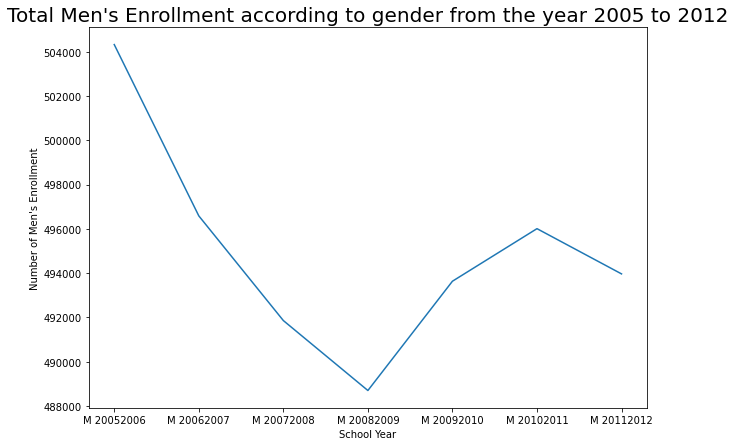

In [68]:
sns.lineplot(x=m_plt_x, y=m_plt_y)
plt.xlabel("School Year",size = 10)
plt.ylabel("Number of Men's Enrollment",size = 10)
plt.title('Total Men\'s Enrollment according to gender from the year 2005 to 2012', size = 20)
plt.show()
plt.rcParams["figure.figsize"] = (10,7)

From the graph,we can see that there is a decrease in the Total enrollment of men's from the year 2005-2006 to 2008-2009 in schools and years 2008-2009 to further years we can see a positive improvement in the enrollment and in the years 2010- 2011 there is again decrease in the graph

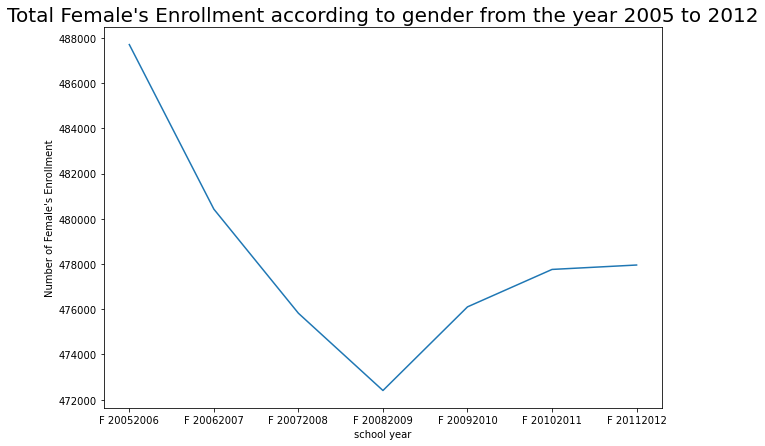

In [67]:
sns.lineplot(x=f_plt_x, y=f_plt_y)
plt.xlabel("school year",size = 10)
plt.ylabel("Number of Female's Enrollment",size = 10)
plt.title('Total Female\'s Enrollment according to gender from the year 2005 to 2012', size = 20)
plt.show()
plt.rcParams["figure.figsize"] = (10,7)

We got almost the same pattern for total female's enrollment in the above graph as total men's enrollment according to gender from the year 2005 to 2012.

We can summarize from the above two visualizations as follows:
* There was huge decline in the enrollement of students for both male and female students in the the year 2008 to 2009.
* As we can assume it was mainly due to the Great Recession of 2008 which had long-lasting impacts on higher education institutions. 
* Because of budget shortfalls, most states had to cut appropriations to higher education during and after the recession. In turn, many public institutions raised tuition to make up for the lost revenue from state appropriations.
* Reference links
     *  https://www.chalkbeat.org/2020/4/22/21230992/great-recession-schools-research-lessons-coronavirus
     *  https://nces.ed.gov/pubs2009/2009081.pdf
     *  https://nces.ed.gov/pubs2009/2009020.pdf